# PROJECT DESCRIPTION


**OBJECTIVE**: Prediction of Gas Turbine CO and NOx Emission 

**Description**: Predict the Gas Turbine CO and NOx Emission using 11 sensor measures aggregated over one hour (by means of average orsum) from a gas turbine located in Turkey's north western region for the purpose of studying flue gas emissions,namely CO and NOx (NO + NO2)

**Motivation**: Harmful effect of Flue gas emitted from power plant turbines on environment has always been a substantial concern. In the recent past years many peaceful protest to save environment has been seen. Environmental organization that seeks to protect, analyse or monitor the environment have conducted many events and activities to raise people awareness on environment.
This project aims to predict emission of flue gases based on sensor data from gas turbine and various Machine Learning techniques. 

The ML model can be used to predict/estimate amount of emission for future operations of Turbine and Turbine of same homologus series. Model output can also be used for validation and backing up of costly continuous emission monitoring systems used in gas-turbine-based power plants. Their implementation relies on the availability of appropriate and ecologically valid data.

**Data Source**: https://archive.ics.uci.edu/ml/datasets/Gas+Turbine+CO+and+NOx+Emission+Data+Set#

**Data Description:** The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine located in Turkey's north western region for the purpose of studying flue gas emissions, namely CO and NOx (NO + NO2).

 **Variable (Abbr.)  &  Unit**

Ambient temperature (AT) C 

Ambient pressure (AP) mbar 

Ambient humidity (AH) (%) 

Air filter difference pressure (AFDP) mbar

Gas turbine exhaust pressure (GTEP) mbar 

Turbine inlet temperature (TIT) C 

Turbine after temperature (TAT) C 

Compressor discharge pressure (CDP) mbar 

Turbine energy yield (TEY) MWH 

Carbon monoxide (CO) mg/m^3

 Nitrogen oxides (NOx) mg/m^3

# Library Import

In [23]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.display import display

# Loading file

In [24]:
# path of each file
path_train_CO = "data_folder/train_CO.csv"

path_CV_CO = "data_folder/CV_CO.csv"

# ===========================================================

df_train_CO = pd.read_csv(path_train_CO)
df_CV_CO = pd.read_csv(path_CV_CO)

In [25]:
display(df_train_CO.info())
display(df_CV_CO.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14483 entries, 0 to 14482
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      14483 non-null  float64
 1   AP      14483 non-null  float64
 2   AH      14483 non-null  float64
 3   AFDP    14483 non-null  float64
 4   GTEP    14483 non-null  float64
 5   TIT     14483 non-null  float64
 6   TAT     14483 non-null  float64
 7   TEY     14483 non-null  float64
 8   CDP     14483 non-null  float64
 9   CO      14483 non-null  float64
 10  NOX     14483 non-null  float64
dtypes: float64(11)
memory usage: 1.2 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7628 entries, 0 to 7627
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      7628 non-null   float64
 1   AP      7628 non-null   float64
 2   AH      7628 non-null   float64
 3   AFDP    7628 non-null   float64
 4   GTEP    7628 non-null   float64
 5   TIT     7628 non-null   float64
 6   TAT     7628 non-null   float64
 7   TEY     7628 non-null   float64
 8   CDP     7628 non-null   float64
 9   CO      7628 non-null   float64
 10  NOX     7628 non-null   float64
dtypes: float64(11)
memory usage: 655.7 KB


None

In [26]:
# All attributes are of float data type and none has null values
print(df_train_CO.isnull().sum().sum(),df_CV_CO.isnull().sum().sum())

0 0


# Statistical Analysis

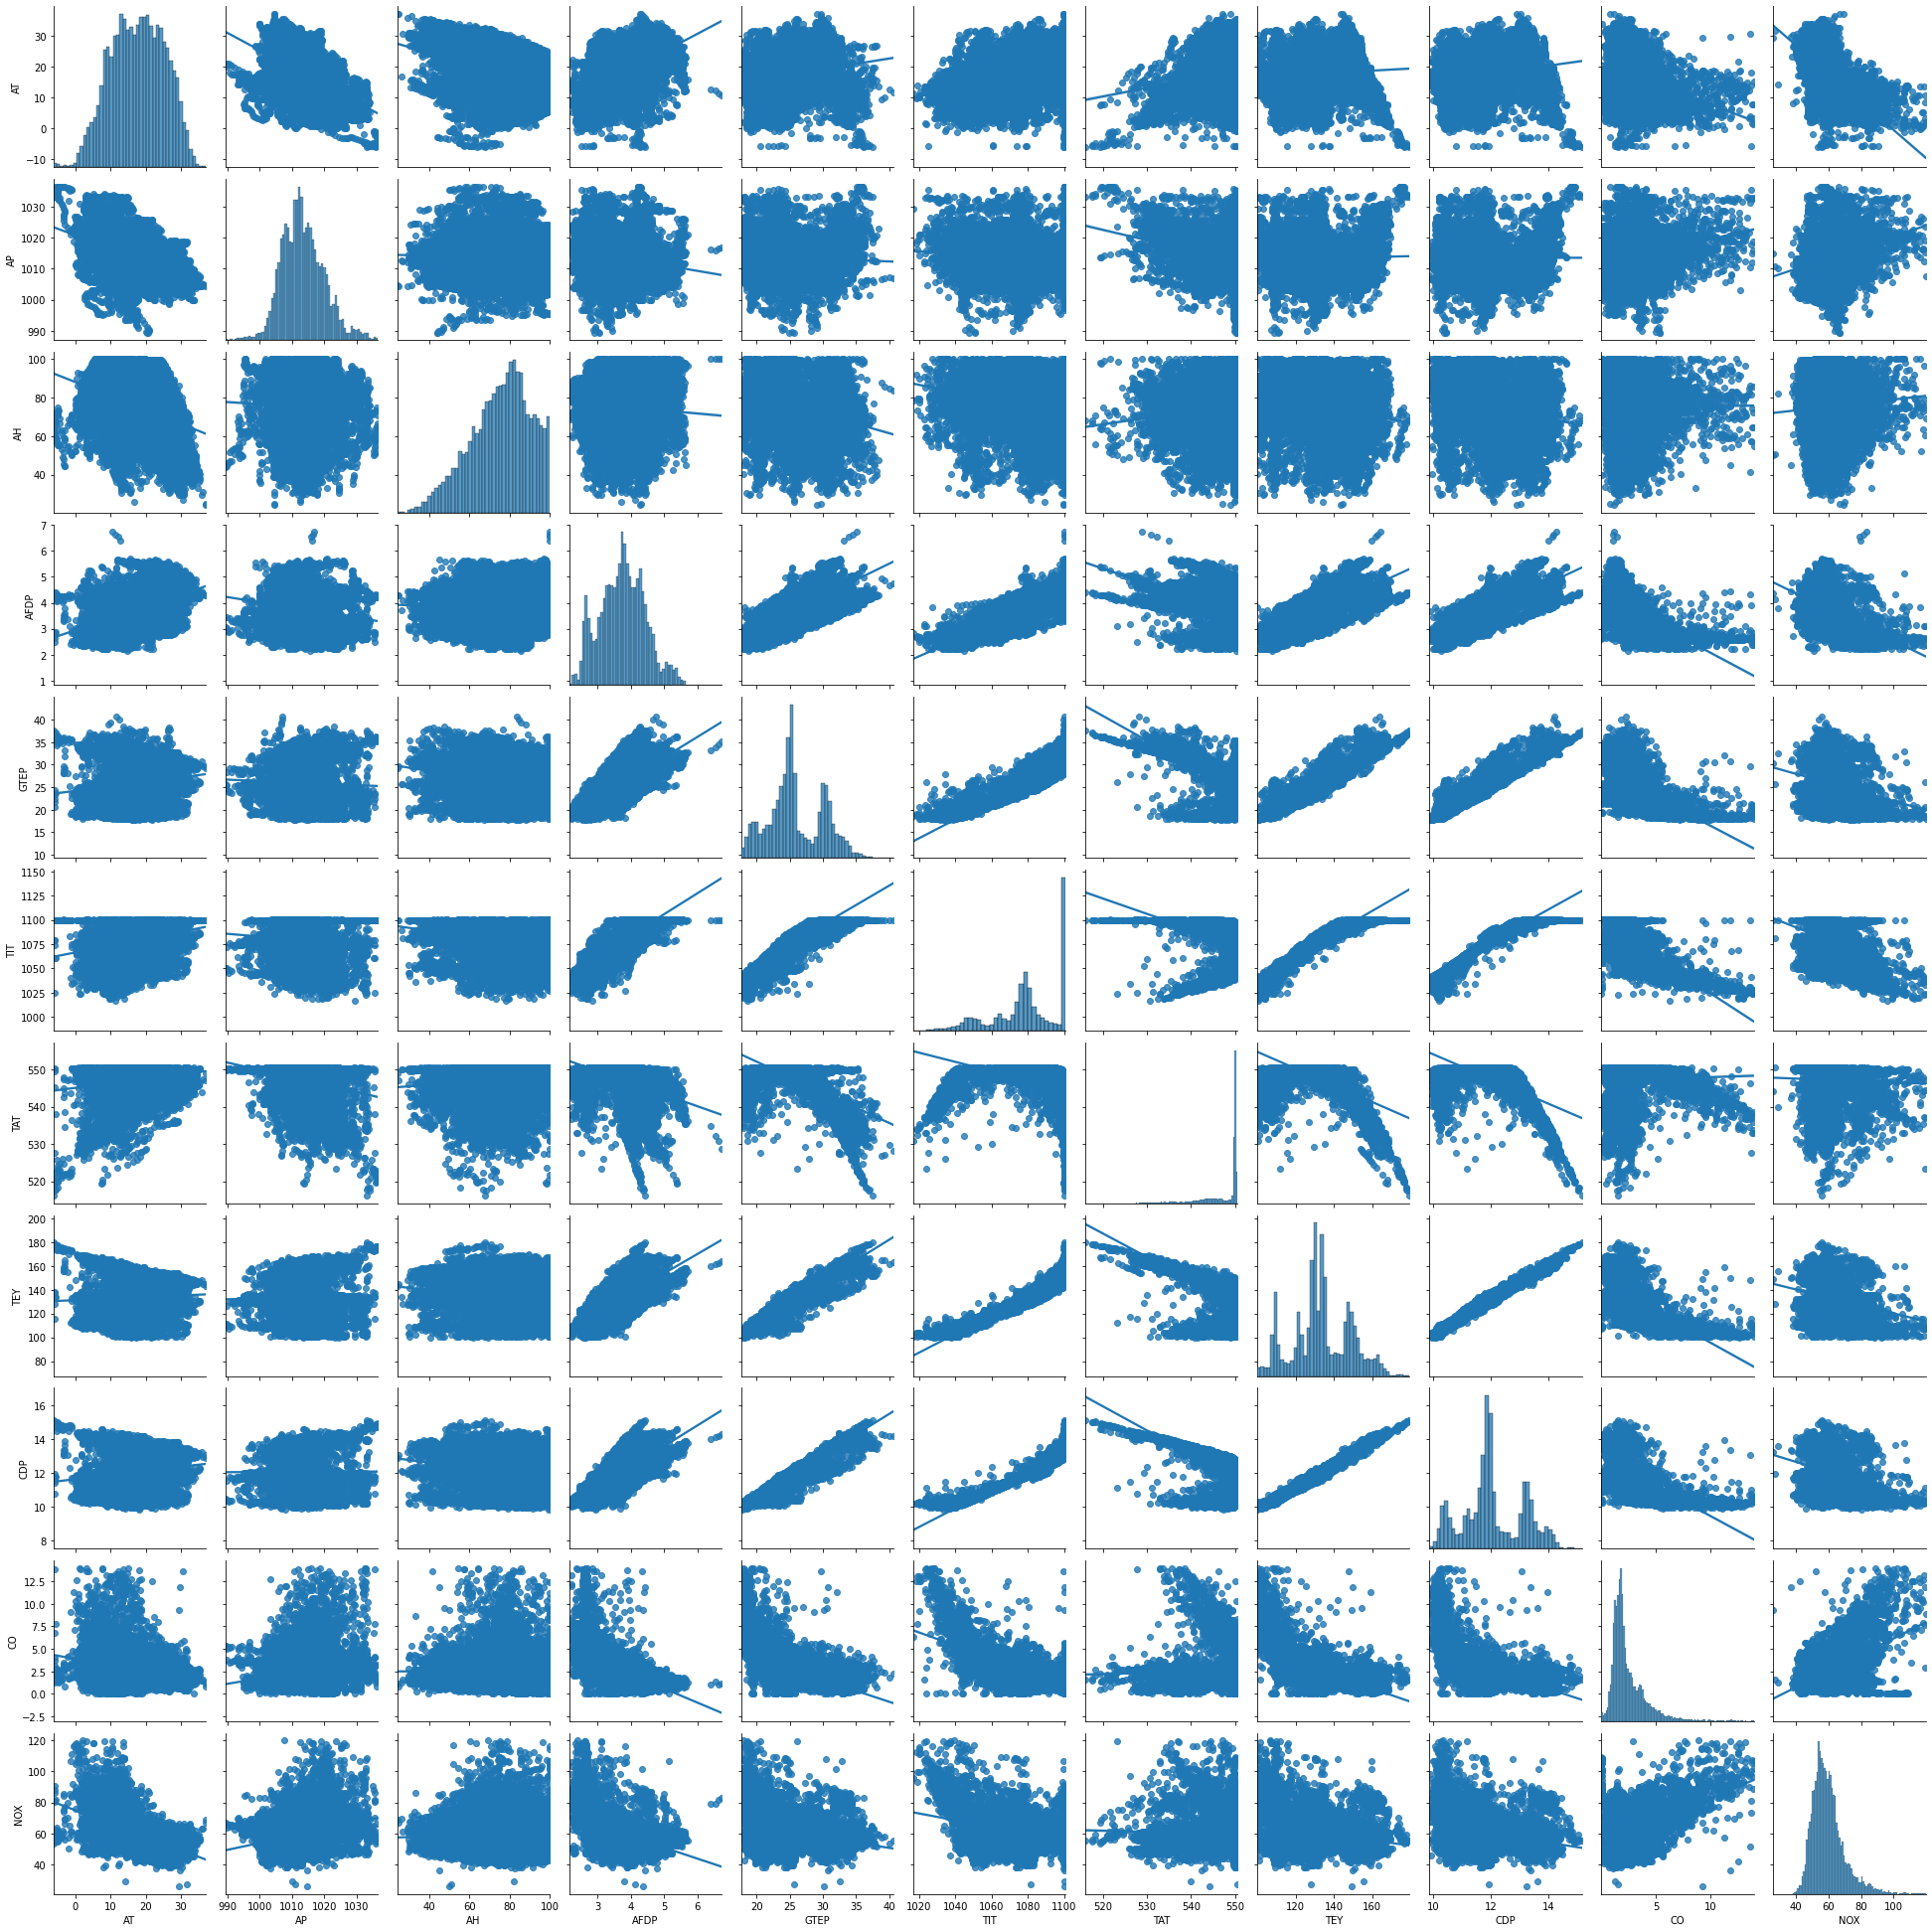

In [27]:
sns.pairplot(data = df_train_CO,kind='reg')

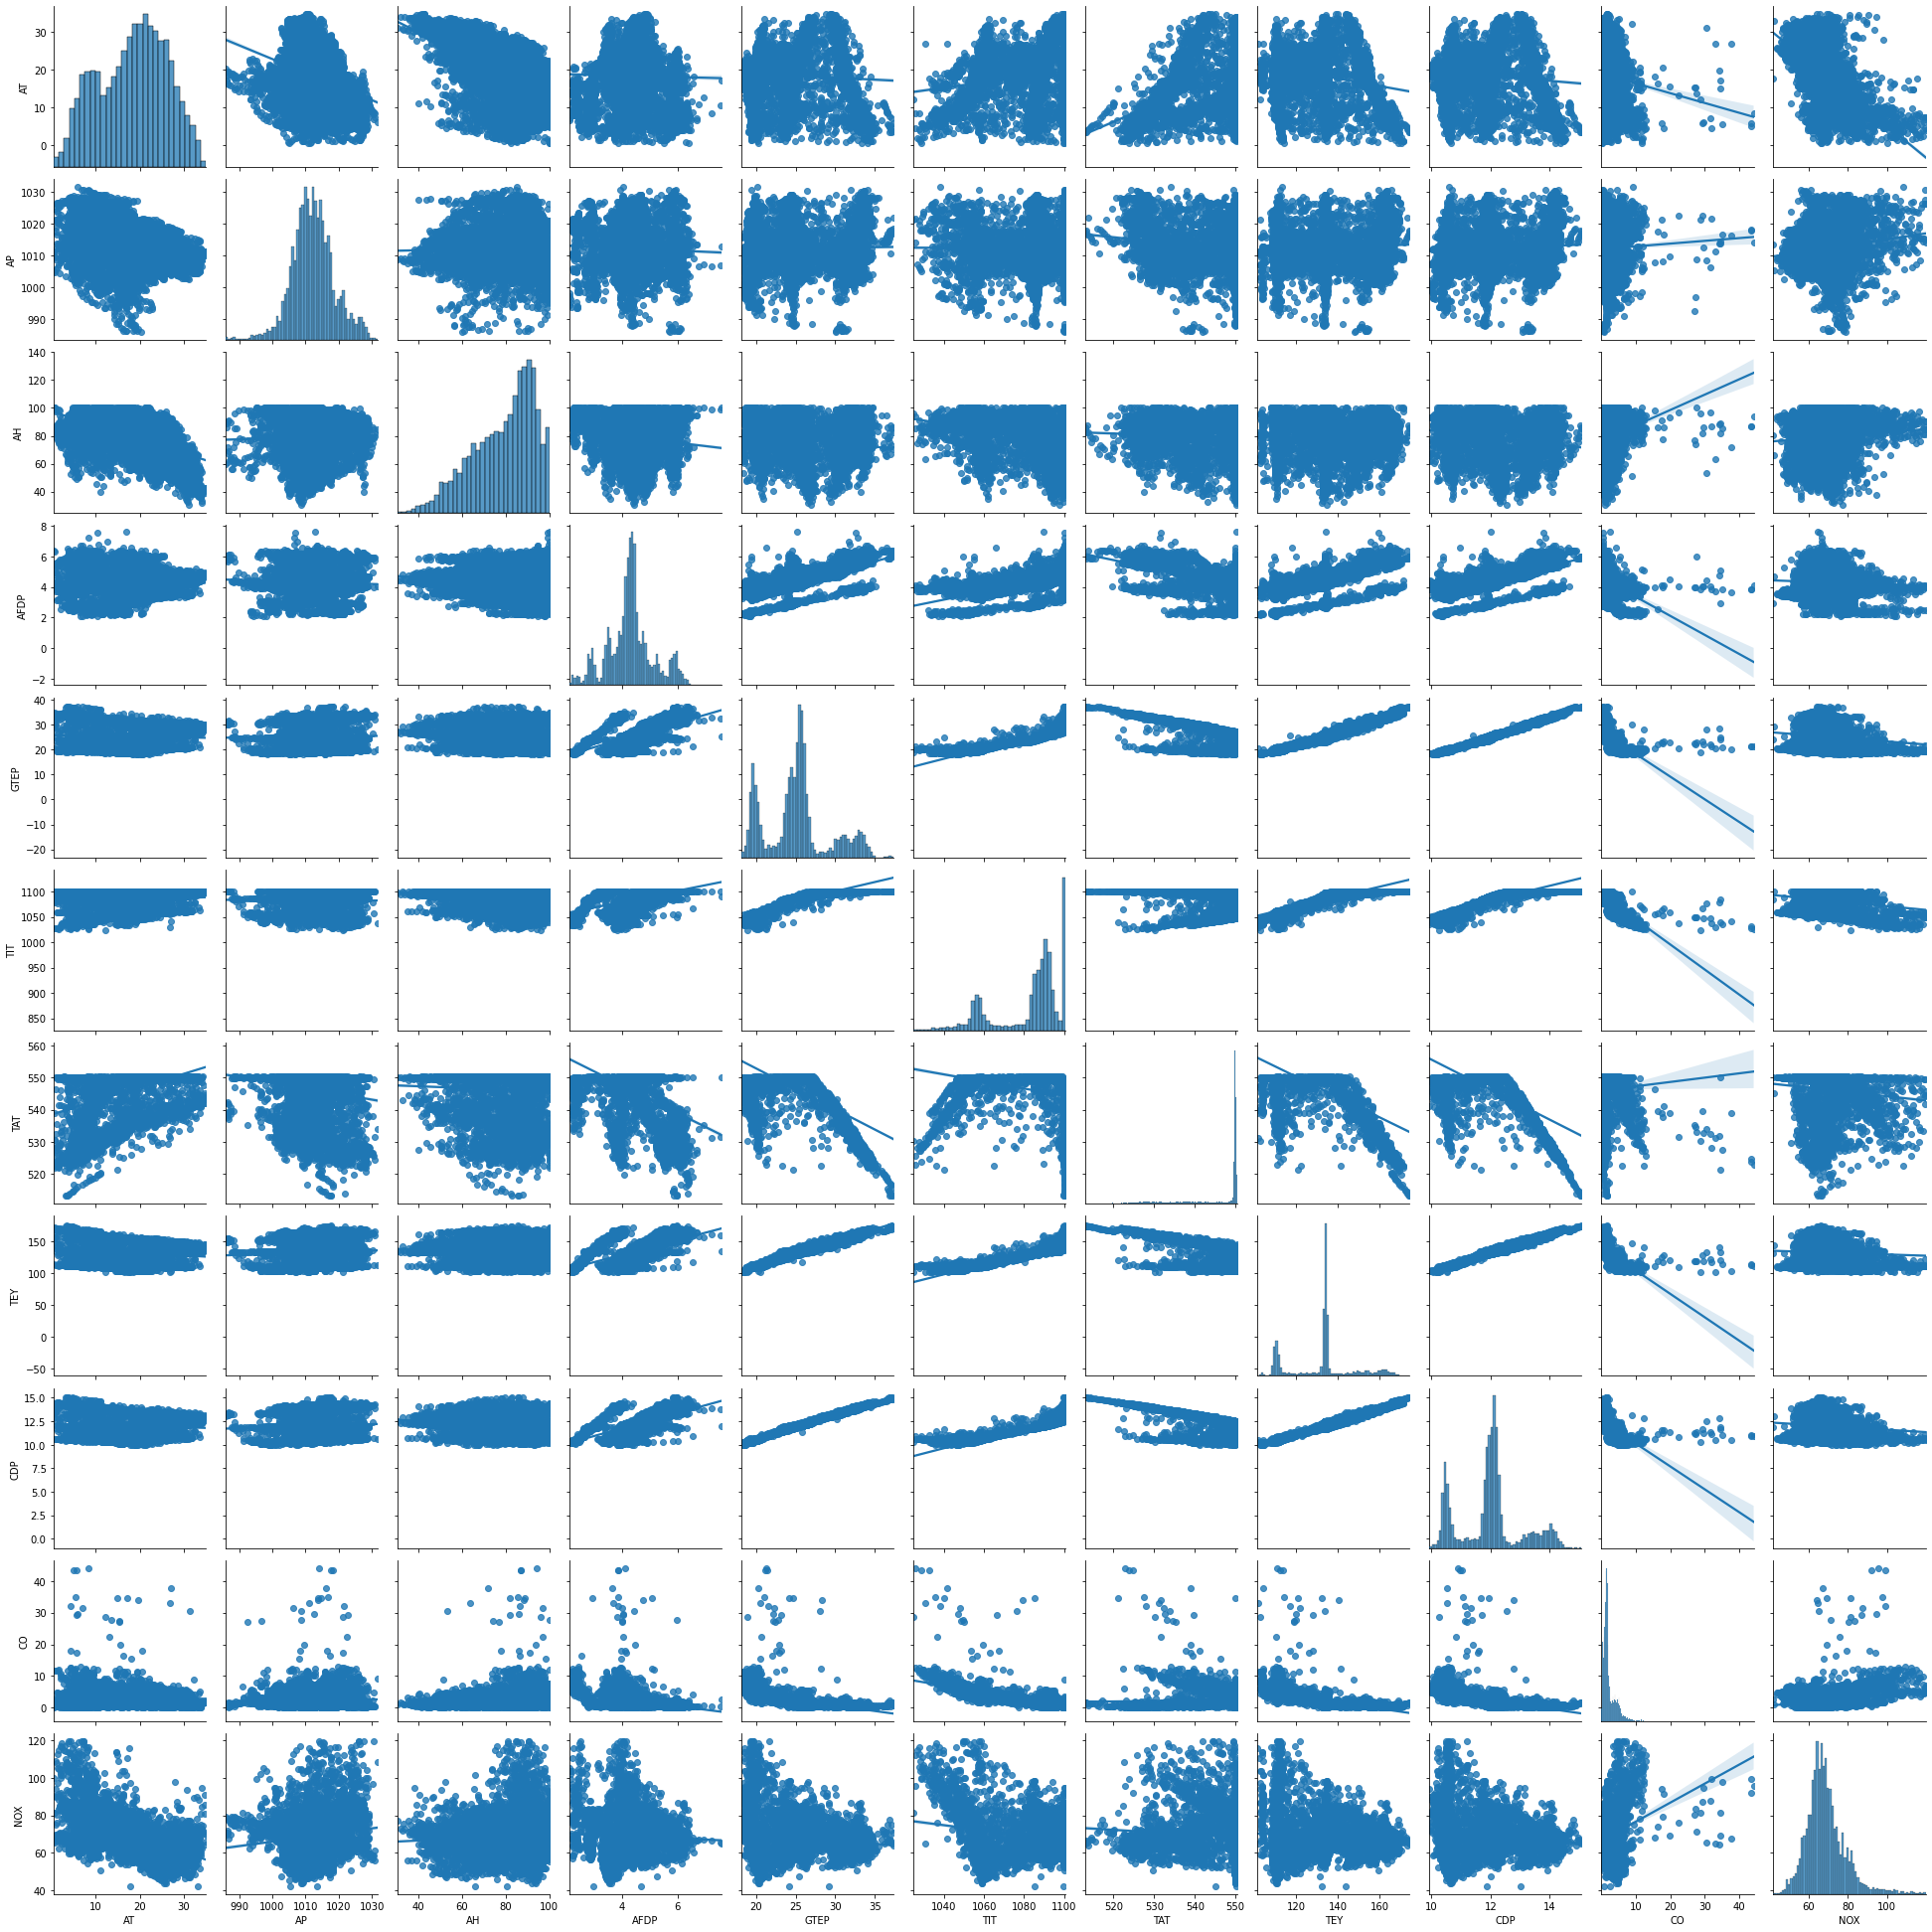

In [28]:
sns.pairplot(data = df_CV_CO,kind='reg')

In [29]:
df_train_CO.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,14483.000000,14483.000000,14483.000000,14483.000000,14483.000000,14483.000000,14483.000000,14483.000000,14483.000000,14483.000000,14483.000000
mean,17.731693,1013.447010,75.287391,3.756525,25.958081,1079.091928,547.183027,133.551063,12.066248,2.538050,59.863799
std,7.591136,6.538122,14.891502,0.679749,4.100955,17.999316,5.024444,14.911638,1.046398,1.792677,10.368606
min,-6.234800,989.400000,24.085000,2.151700,17.698000,1016.700000,516.040000,100.020000,9.851800,0.001640,25.905000
25%,11.990500,1008.800000,65.612500,3.278350,23.328500,1070.300000,545.660000,125.000000,11.466000,1.466300,53.023000
50%,17.910000,1012.800000,77.060000,3.762100,25.231000,1079.500000,549.850000,132.750000,11.916000,1.951600,58.090000
75%,23.711000,1017.400000,86.318000,4.232900,29.772500,1099.600000,550.040000,146.060000,13.067000,3.092050,64.240000
max,37.103000,1036.600000,100.100000,6.738600,40.716000,1100.900000,550.600000,179.500000,15.159000,13.992000,119.680000


In [30]:
df_CV_CO.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,7628.000000,7628.000000,7628.000000,7628.000000,7628.000000,7628.000000,7628.000000,7628.000000,7628.000000,7628.000000,7628.000000
mean,18.397950,1012.258153,79.074804,4.306717,25.181361,1082.890233,546.263793,132.675552,12.000121,2.361133,68.788965
std,7.661038,6.384291,14.105087,0.831170,4.006825,16.852148,7.331345,15.302140,1.049384,2.474116,10.224937
min,0.522300,985.850000,30.344000,2.087400,18.100000,1024.600000,513.060000,101.150000,9.928600,0.007505,41.777000
25%,12.269250,1008.400000,69.165250,3.882650,23.090750,1075.800000,547.657500,125.240000,11.469750,1.127125,62.531250
50%,19.120500,1012.000000,82.411500,4.298050,25.221000,1089.100000,549.920000,133.760000,12.041000,1.636300,67.246500
75%,24.337250,1016.000000,90.356250,4.670525,26.322250,1093.800000,550.070000,134.900000,12.290000,2.953025,73.424500
max,34.929000,1031.800000,100.200000,7.610600,37.402000,1100.800000,550.530000,174.610000,15.081000,44.103000,119.890000


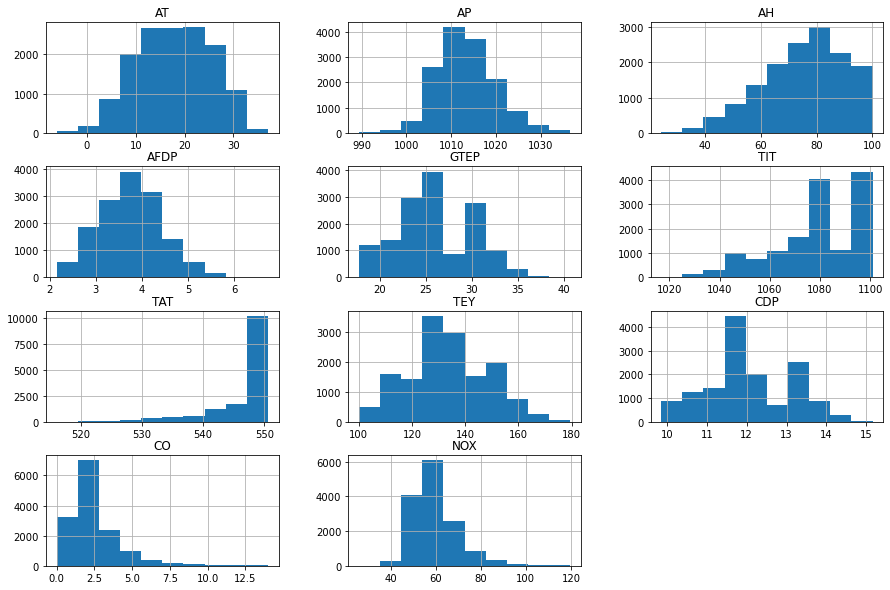

In [31]:
df_train_CO.hist(figsize=(15,10))
plt.show()

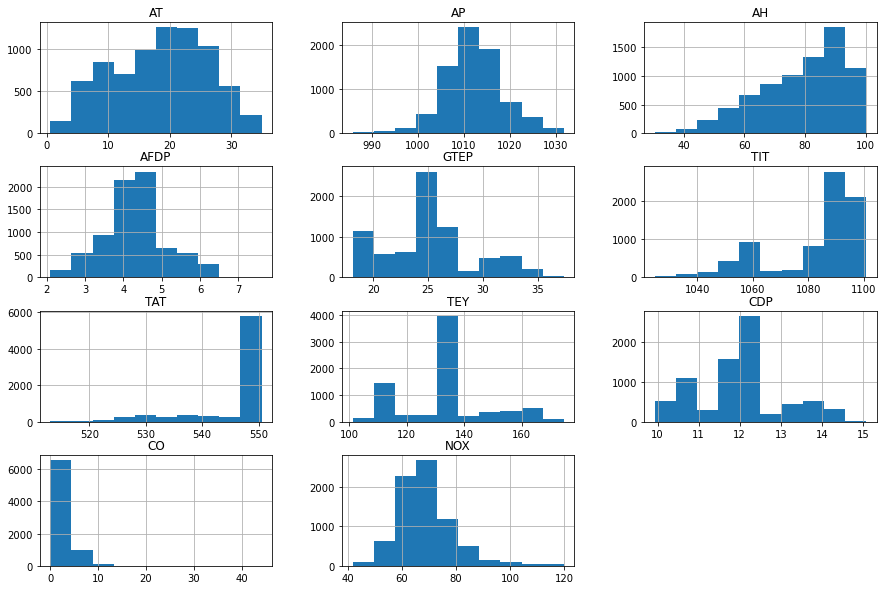

In [32]:
df_CV_CO.hist(figsize=(15,10))
plt.show()

# Modelling

## CO PREDICTION

In [33]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import model_selection
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

### Feature and Target Variable split data

In [34]:
# Shuffling Data
df_train_CO = shuffle(df_train_CO)
print(df_train_CO.shape)
# =============================================

# ========Selecting predictor columns==========

X_cols = df_train_CO.drop(columns=['AP','TIT', 'AT','AH',"CO",'NOX']).columns[:] # as per paper
y_cols = df_train_CO.columns[-2]
#==============================================

# =============data slicing====================
# train data
dfX_tr = df_train_CO.loc[:,X_cols]
dfY_tr = df_train_CO.loc[:,y_cols]

# CV data
dfX_CV = df_CV_CO.loc[:,X_cols]
dfY_CV = df_CV_CO.loc[:,y_cols]
#==============================================


# ===================data scale================
# train data Scale
scaler = StandardScaler()
scaler.fit(dfX_tr)
dfX_tr_t = scaler.transform(dfX_tr)
dfX_tr = pd.DataFrame(data = dfX_tr_t, columns=X_cols).reset_index(drop=True)

# CV data Scale
dfX_CV_t = scaler.transform(dfX_CV)
dfX_CV = pd.DataFrame(data = dfX_CV_t, columns=X_cols).reset_index(drop=True)

#==============================================
print(dfX_tr.shape,dfY_tr.shape,dfX_CV.shape,dfY_CV.shape)
y_cols

(14483, 11)
(14483, 5) (14483,) (7628, 5) (7628,)


'CO'

In [35]:
dfX_tr.head(2)

,AFDP,GTEP,TAT,TEY,CDP
0,-1.930816,-1.295373,0.522857,-1.747089,-1.758711
1,0.073964,-0.750359,0.494992,-0.841054,-0.741854


In [36]:
# Polynomial features transformation
deg = 2
poly = PolynomialFeatures(degree=deg)
poly.fit(dfX_tr)
dfX_tr = poly.transform(dfX_tr)

poly2 = PolynomialFeatures(degree=deg)
poly2.fit(dfX_CV)
dfX_CV = poly2.transform(dfX_CV)
dfX_tr.shape, dfX_CV.shape

((14483, 21), (7628, 21))

### Linear Regression

In [37]:
# Linear Regression
lr = LinearRegression(fit_intercept=True)
lr.fit(dfX_tr,dfY_tr)

yhat = lr.predict(dfX_tr)  # prediction on train data
yhat_CV = lr.predict(dfX_CV) # prediction on CV data

mse = mean_squared_error(yhat, dfY_tr)  # MSE train
mse_CV = mean_squared_error(yhat_CV, dfY_CV)  # MSE CV

R_tr = r2_score(dfY_tr,yhat)  # train R_square
R_CV = r2_score(dfY_CV, yhat_CV)  # CV R_square

# Adjusted R_squared

A_R_tr = 1- ((1-R_tr)*(len(dfY_tr)-1))/(len(dfY_tr)-dfX_tr.shape[1]-1)  # train Adjusted_R_square
A_R_CV = 1- ((1-R_CV)*(len(dfY_CV)-1))/(len(dfY_CV)-dfX_CV.shape[1]-1)  # CV A_djustedR_square

print("RMSE train    : ",np.sqrt(mse),"\tRMSE CV      : ", np.sqrt(mse_CV))
print("R_square train: ",R_tr,        "\tR_square CV  : ",R_CV)
print("Adjusted_R_square train: ",A_R_tr,        "\tAdjusted_R_square CV  : ",A_R_CV)


lr.coef_

RMSE train    :  0.91140803086399 	RMSE CV      :  1.5704539647297644
R_square train:  0.7415052031112856 	R_square CV  :  0.5970352182217867
Adjusted_R_square train:  0.7411298216898996 	Adjusted_R_square CV  :  0.5959226412539531


array([ 0.        , -0.23522793, -1.12214944, -1.06312341,  0.09973529,
       -0.20387311, -0.08455992, -0.65897816, -0.00546513, -2.09055588,
        2.76388905,  1.25683696,  0.11193755,  1.87910699, -3.57370128,
        0.09022303,  0.09427365,  0.5728058 , -1.47061358,  3.0150459 ,
       -0.38867647])

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


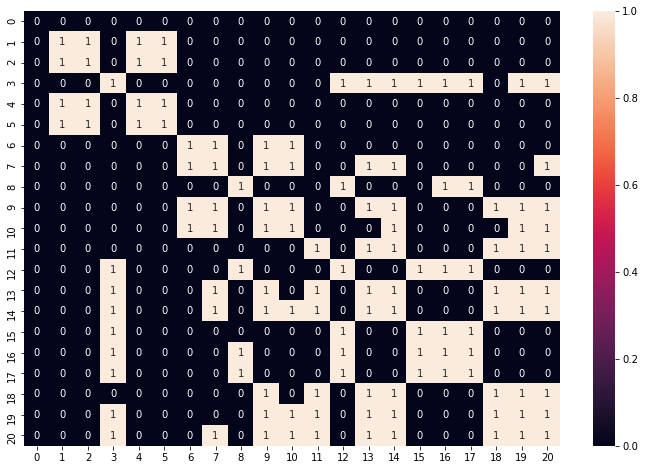

In [38]:
plt.figure(figsize=(12,8))
corr_mat = np.corrcoef(dfX_tr,rowvar=False)
sns.heatmap(abs(corr_mat)>0.7,annot=True)
plt.show()

[20.44731024  6.17547374  2.72838743  1.19732015  0.88201569]


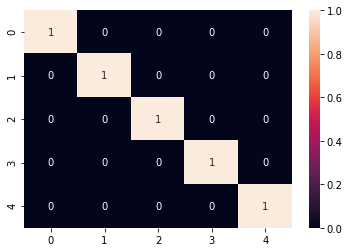

(14483, 5)


In [39]:
decom = PCA(n_components=5)
decom.fit(dfX_tr)
dfX_tr = decom.transform(dfX_tr)
dfX_CV = decom.transform(dfX_CV)
print(decom.explained_variance_)
sns.heatmap(np.corrcoef(dfX_tr, rowvar=False)>0.1,annot=True)
plt.show()
print(dfX_tr.shape)

In [40]:
# Linear Regression
lr = LinearRegression(fit_intercept=True,normalize=False)
lr.fit(dfX_tr,dfY_tr)

yhat = lr.predict(dfX_tr)  # prediction on train data
yhat_CV = lr.predict(dfX_CV) # prediction on CV data

mse = mean_squared_error(yhat, dfY_tr)  # MSE train
mse_CV = mean_squared_error(yhat_CV, dfY_CV)  # MSE CV

R_tr = r2_score(dfY_tr,yhat)  # train R_square
R_CV = r2_score(dfY_CV, yhat_CV)  # CV R_square

# Adjusted R_squared

A_R_tr = 1- ((1-R_tr)*(len(dfY_tr)-1))/(len(dfY_tr)-dfX_tr.shape[1]-1)  # train Adjusted_R_square
A_R_CV = 1- ((1-R_CV)*(len(dfY_CV)-1))/(len(dfY_CV)-dfX_CV.shape[1]-1)  # CV A_djustedR_square

print("RMSE train    : ",np.sqrt(mse),"\tRMSE CV      : ", np.sqrt(mse_CV))
print("R_square train: ",R_tr,        "\tR_square CV  : ",R_CV)
print("Adjusted_R_square train: ",A_R_tr,        "\tAdjusted_R_square CV  : ",A_R_CV)

lr.coef_

RMSE train    :  0.9869686208908901 	RMSE CV      :  1.6422458557398942
R_square train:  0.6968672955923841 	R_square CV  :  0.5593507654837597
Adjusted_R_square train:  0.6967626010063485 	Adjusted_R_square CV  :  0.5590617014359269


array([ 0.01619918,  0.50158962, -0.42348079, -0.14818516,  0.43233251])

### Ridge Regression


In [41]:
# Ridge Regression
mse_tr_list = []
mse_CV_list = []

R_tr_list = []
R_CV_list = []
A_R_tr_list = []
A_R_CV_list = []

for alpha in range(0,100):
    lr = Ridge(alpha=alpha, fit_intercept=True,max_iter=None, solver='auto')
    lr.fit(dfX_tr,dfY_tr)

    yhat = lr.predict(dfX_tr)  # prediction on train data
    yhat_CV = lr.predict(dfX_CV) # prediction on CV data


    mse = mean_squared_error(yhat, dfY_tr)  # MSE train
    mse_tr_list.append(mse)

    mse_CV = mean_squared_error(yhat_CV, dfY_CV)  # MSE CV
    mse_CV_list.append(mse_CV)


    R_tr = lr.score(dfX_tr,dfY_tr)  # train R_square
    R_tr_list.append(R_tr)

    R_CV = lr.score(dfX_CV,dfY_CV)  # CV R_square
    R_CV_list.append(R_CV)

    # Adjusted R_squared

    A_R_tr = 1- ((1-R_tr)*(len(dfY_tr)-1))/(len(dfY_tr)-dfX_tr.shape[1]-1)  # train Adjusted_R_square
    A_R_CV = 1- ((1-R_CV)*(len(dfY_CV)-1))/(len(dfY_CV)-dfX_CV.shape[1]-1)  # CV A_djustedR_square
    A_R_tr_list.append(A_R_tr)
    A_R_CV_list.append(A_R_CV)


print("MSE_tr",mse_tr_list.index(min(mse_tr_list)), min(mse_tr_list))
print("MSE_CV",mse_CV_list.index(min(mse_CV_list)), min(mse_CV_list))
print("R_train",R_tr_list.index(max(R_tr_list)), max(R_tr_list))
print("R_CV",R_CV_list.index(max(R_CV_list)), max(R_CV_list))
print("Adjusted R_train",A_R_tr_list.index(max(A_R_tr_list)), max(A_R_tr_list))
print("Adjusted_R_CV",A_R_CV_list.index(max(A_R_CV_list)), max(A_R_CV_list))


MSE_tr 0 0.9741070586232655
MSE_CV 0 2.6969714506948628
R_train 0 0.6968672955923841
R_CV 0 0.5593507654837588
Adjusted R_train 0 0.6967626010063485
Adjusted_R_CV 0 0.559061701435926


### Decision Tree

In [42]:
# Decision Tree regression model
dtr = DecisionTreeRegressor(max_depth=4, criterion='mse', random_state=126865488)
dtr.fit(dfX_tr,dfY_tr)

mse = mean_squared_error(dfY_tr,dtr.predict(dfX_tr))
mse_CV = mean_squared_error(dfY_CV,dtr.predict(dfX_CV))
R_tr = dtr.score(dfX_tr,dfY_tr)  # train R_square
R_CV = dtr.score(dfX_CV,dfY_CV)  # CV R_square

# Adjusted R_squared
A_R_tr = 1- ((1-R_tr)*(len(dfY_tr)-1))/(len(dfY_tr)-dfX_tr.shape[1]-1)  # train Adjusted_R_square
A_R_CV = 1- ((1-R_CV)*(len(dfY_CV)-1))/(len(dfY_CV)-dfX_CV.shape[1]-1)  # CV A_djustedR_square

print("RMSE train    : ",np.sqrt(mse),"\tRMSE CV      : ", np.sqrt(mse_CV))
print("R_square train: ",R_tr,        "\tR_square CV  : ",R_CV)
print("Adjusted_R_square train: ",A_R_tr,        "\tAdjusted_R_square CV  : ",A_R_CV)

RMSE train    :  0.917049511776847 	RMSE CV      :  1.9413060473637664
R_square train:  0.7382952099499145 	R_square CV  :  0.38424962404737784
Adjusted_R_square train:  0.7382048235473275 	Adjusted_R_square CV  :  0.38384569438590277


### Random Forest

In [43]:
# Random forest
R_tr_list = []
R_CV_list = []
for i in range(1,20):
    rfReg = RandomForestRegressor(max_depth=i,n_estimators=100,n_jobs=-1, criterion='mse',
                                warm_start=True,oob_score=True, bootstrap=True,
                                  max_features=3, random_state=126865488)
    rfReg.fit(dfX_tr,dfY_tr)

    R_tr = rfReg.score(dfX_tr,dfY_tr)  # train R_square
    R_tr_list.append(R_tr)
    R_CV = rfReg.score(dfX_CV,dfY_CV)  # CV R_square
    R_CV_list.append(R_CV)
    print(i,"--","R_square train: ",R_tr,        "\tR_square CV  : ",R_CV)

1 -- R_square train:  0.4846632436158299 	R_square CV  :  0.13577196937981306
2 -- R_square train:  0.637833166594855 	R_square CV  :  0.1886714512448413
3 -- R_square train:  0.7076117482621166 	R_square CV  :  0.27479040592289683
4 -- R_square train:  0.7499481137719406 	R_square CV  :  0.3738904128425403
5 -- R_square train:  0.7760178675171816 	R_square CV  :  0.4277389291371466
6 -- R_square train:  0.7986707862073976 	R_square CV  :  0.42719007949628907
7 -- R_square train:  0.8203840332069527 	R_square CV  :  0.41861065031273403
8 -- R_square train:  0.8399530298169542 	R_square CV  :  0.4156934581221795
9 -- R_square train:  0.8579286068856425 	R_square CV  :  0.41220196768255146
10 -- R_square train:  0.8752749798262787 	R_square CV  :  0.4180729685999217
11 -- R_square train:  0.8904545741548058 	R_square CV  :  0.4121859649164079
12 -- R_square train:  0.9050909338741625 	R_square CV  :  0.41855597811118805
13 -- R_square train:  0.9175262507621519 	R_square CV  :  0.4097891

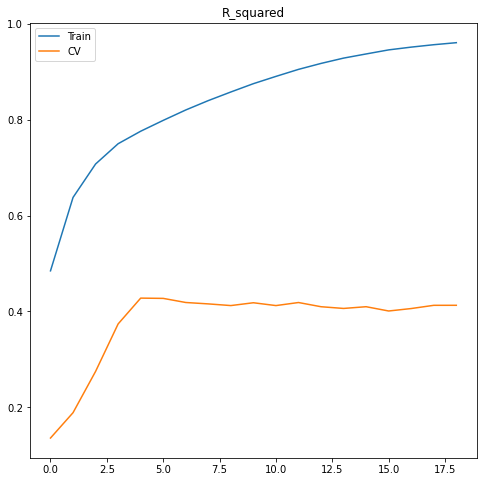

In [44]:
plt.figure(figsize=(8,8))
plt.plot(R_tr_list)
plt.plot(R_CV_list)
plt.legend(['Train','CV'])
plt.title("R_squared")
plt.show()

### Support Vector

In [45]:
svRegr = SVR(C=0.06,epsilon=0.1,kernel='linear')
svRegr.fit(dfX_tr, dfY_tr)

R_tr = svRegr.score(dfX_tr,dfY_tr)  # train R_square
R_CV = svRegr.score(dfX_CV,dfY_CV)  # CV R_square


# Adjusted R_squared

A_R_tr = 1- ((1-R_tr)*(len(dfY_tr)-1))/(len(dfY_tr)-dfX_tr.shape[1]-1)  # train Adjusted_R_square
A_R_CV = 1- ((1-R_CV)*(len(dfY_CV)-1))/(len(dfY_CV)-dfX_CV.shape[1]-1)  # CV A_djustedR_square

mse = mean_squared_error(dfY_tr,svRegr.predict(dfX_tr))
mse_CV = mean_squared_error(dfY_CV,svRegr.predict(dfX_CV))

print("RMSE train    : ",np.sqrt(mse),"\tRMSE CV      : ", np.sqrt(mse_CV))
print("R_square train: ",R_tr,        "\tR_square CV  : ",R_CV)
print("Adjusted_R_square train: ",A_R_tr,        "\tAdjusted_R_square CV  : ",A_R_CV)

RMSE train    :  0.9961121960501145 	RMSE CV      :  1.6298278556426813
R_square train:  0.6912246528236835 	R_square CV  :  0.5659895933521162
Adjusted_R_square train:  0.6911180094075142 	Adjusted_R_square CV  :  0.5657048843474928


We found Linear Regression and SVM Regressor  have maximum R_squared value

Linear_Regression --- R_squared = 0.5593

SVM Regressor --- R_squared = 0.5594

We will take our final model as SVM Regressor since it's R_squared is more stable as compared to Linear Regression

### Final training on both train and CV data

From train and CV we found best alogirithm is SVM Regressor. We will see performance of all the models over test data when they are trained over both train and CV but we will take SVM Regressor as Final

In [46]:
## Data for final training

# =============loading train data ===================
df_f = pd.concat([df_train_CO, df_CV_CO]).reset_index(drop =True)
print(df_f.shape)

# =============loading test data ===================
path_test_CO = "data_folder/test_CO.csv"
df_test_CO = pd.read_csv(path_test_CO)
print(df_test_CO.shape)

#===================================================

# Shuffling Data
df_f = shuffle(df_f)
print(df_f.shape)
# =============================================

# ========Selecting predictor columns==========
X_cols = df_f.drop(columns=['AP','TIT', 'AT','AH','CO','NOX']).columns[:] # as per paper
y_cols = df_f.columns[-2]
#==============================================

# =============data slicing====================
# train data
dfX_f = df_f.loc[:,X_cols]
dfY_f = df_f.loc[:,y_cols]

# test data
dfX_test = df_test_CO.loc[:,X_cols]
dfY_test = df_test_CO.loc[:,y_cols]
#==============================================


# ===================data scale================
# train data Scale
scalerCO = StandardScaler()
scalerCO.fit(dfX_f)
dfX_f_t = scalerCO.transform(dfX_f)
dfX_f = pd.DataFrame(data = dfX_f_t, columns=X_cols).reset_index(drop=True)


# test data scale
dfX_test_t = scalerCO.transform(dfX_test)
dfX_test = pd.DataFrame(data = dfX_test_t, columns=X_cols).reset_index(drop=True)
#==============================================
print(dfX_f.shape,dfY_f.shape, dfX_test.shape, dfY_test.shape)
y_cols

(22111, 11)
(14563, 11)
(22111, 11)
(22111, 5) (22111,) (14563, 5) (14563,)


'CO'

In [47]:
X_cols

Index(['AFDP', 'GTEP', 'TAT', 'TEY', 'CDP'], dtype='object')

In [48]:
# Polynomial features  # Reqired to do this
from sklearn.preprocessing import PolynomialFeatures
deg = 2
poly = PolynomialFeatures(degree=deg)
poly.fit(dfX_f)
dfX_f = poly.transform(dfX_f)

poly2CO = PolynomialFeatures(degree=deg)
poly2CO.fit(dfX_test)
dfX_test = poly2CO.transform(dfX_test)
dfX_f.shape, dfX_test.shape

((22111, 21), (14563, 21))

In [49]:
# Linear Regression # ----> Final
LRmodelCO = LinearRegression(fit_intercept=True)
LRmodelCO.fit(dfX_f,dfY_f)

yhatST = LRmodelCO.predict(dfX_f)  # prediction on train data
yhatST_test = LRmodelCO.predict(dfX_test) # prediction on test data


MSE_ST = mean_squared_error(yhatST, dfY_f)  # MSE train
MSE_ST_t = mean_squared_error(yhatST_test, dfY_test)  # MSE test

R_ST = r2_score(dfY_f,yhatST)  # train R_square
R_ST_t = r2_score(dfY_test, yhatST_test)  # test R_square

print("RMSE train    : ",np.sqrt(MSE_ST),"\tRMSE test      : ", np.sqrt(MSE_ST_t))
print("R_square train: ",R_ST,        "\tR_square test  : ",R_ST_t)
LRmodelCO.coef_

RMSE train    :  1.1462734231535199 	RMSE test      :  1.4729904001155403
R_square train:  0.6888905742170593 	R_square test  :  0.5487011062832419


array([ 0.        , -0.22433391, -0.90289894, -0.98927396, -0.81178805,
        0.49218662, -0.06191806, -0.65486592,  0.07994279, -1.13021757,
        1.8801719 ,  0.86316566,  0.1694845 ,  2.60495212, -3.50278964,
        0.17773328,  1.8788734 , -1.2010462 , -0.86195312,  1.72380434,
       -0.18052727])

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


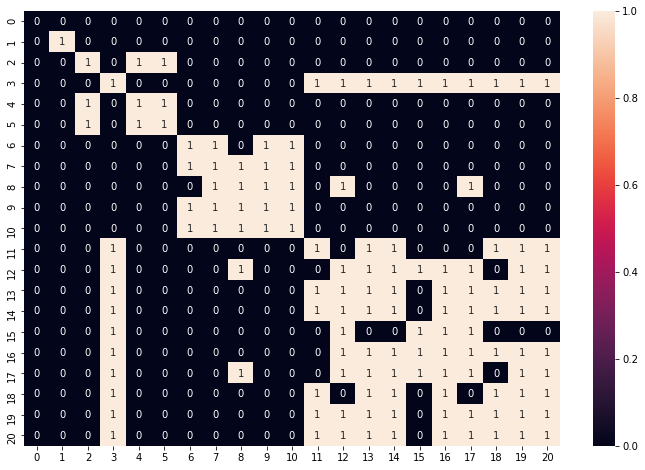

In [50]:
plt.figure(figsize=(12,8))
corr_mat_f = np.corrcoef(dfX_f,rowvar=False)

sns.heatmap(abs(corr_mat_f)>0.7,annot=True)
plt.show()

[23.5369324   5.1079817   3.5171177   1.4916853   0.86984344]


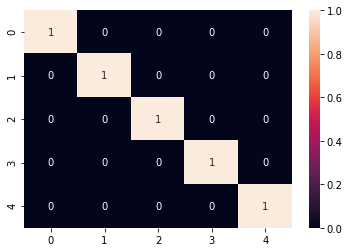

In [51]:
decomCO = PCA(n_components=5)
decomCO.fit(dfX_f)
dfX_f = decomCO.transform(dfX_f)
dfX_test = decomCO.transform(dfX_test)
print(decomCO.explained_variance_)
sns.heatmap(np.corrcoef(dfX_f, rowvar=False)>0.1,annot=True)
plt.show()

In [52]:
dfX_f.shape

(22111, 5)

In [53]:
# Linear Regression # ----> Final
LRmodelCO = LinearRegression(fit_intercept=True)
LRmodelCO.fit(dfX_f,dfY_f)

yhatST = LRmodelCO.predict(dfX_f)  # prediction on train data
yhatST_test = LRmodelCO.predict(dfX_test) # prediction on test data


MSE_ST = mean_squared_error(yhatST, dfY_f)  # MSE train
MSE_ST_t = mean_squared_error(yhatST_test, dfY_test)  # MSE test

R_ST = r2_score(dfY_f,yhatST)  # train R_square
R_ST_t = r2_score(dfY_test, yhatST_test)  # test R_square

print("RMSE train    : ",np.sqrt(MSE_ST),"\tRMSE test      : ", np.sqrt(MSE_ST_t))
print("R_square train: ",R_ST,        "\tR_square test  : ",R_ST_t)
LRmodelCO.coef_

RMSE train    :  1.2102805721505592 	RMSE test      :  1.4187374047114343
R_square train:  0.6531762364807239 	R_square test  :  0.5813332472405461


array([-0.01411737,  0.59073902, -0.32073844,  0.23216149,  0.78006596])

In [54]:
# Decision Tree regression model
dtrCO = DecisionTreeRegressor(max_depth=4, criterion='mse', random_state=126865488)
dtrCO.fit(dfX_f,dfY_f)

R_tr = dtrCO.score(dfX_f,dfY_f)  # train R_square
R_t = dtrCO.score(dfX_test,dfY_test)  # CV R_square

print("R_square train: ",R_tr,        "\tR_square test  : ",R_t)

R_square train:  0.6708108340503138 	R_square test  :  0.5145532211228915


In [55]:
RTr_list = []
RT_list = []
for i in range(1,20):
    rfRegCO = RandomForestRegressor(max_depth=i,n_estimators=100,n_jobs=-1, criterion='mse',max_features=3,
                             warm_start=True,oob_score=True, bootstrap=True, random_state=1255634)
    rfRegCO.fit(dfX_f,dfY_f)


    R_tr = rfRegCO.score(dfX_f,dfY_f)  # train R_square
    RTr_list.append(R_tr)
    R_test = rfRegCO.score(dfX_test,dfY_test)  # test R_square
    RT_list.append(R_test)

    print('depth: ',i,"R_square train: ",R_tr,        "\tR_square test  : ",R_test)

depth:  1 R_square train:  0.43116705822819745 	R_square test  :  0.38756652766330557
depth:  2 R_square train:  0.577364852574493 	R_square test  :  0.5030660425390141
depth:  3 R_square train:  0.6514302122497688 	R_square test  :  0.5498482390570567
depth:  4 R_square train:  0.7087107757671351 	R_square test  :  0.57680221483476
depth:  5 R_square train:  0.7450681224222504 	R_square test  :  0.5933946815675133
depth:  6 R_square train:  0.7748716959815043 	R_square test  :  0.599024461221501
depth:  7 R_square train:  0.798814701414149 	R_square test  :  0.5995665916467434
depth:  8 R_square train:  0.8200865740756487 	R_square test  :  0.5942496893660623
depth:  9 R_square train:  0.8379922418090875 	R_square test  :  0.5913130819224083
depth:  10 R_square train:  0.8556438046544366 	R_square test  :  0.5926581452888289
depth:  11 R_square train:  0.8693943219589959 	R_square test  :  0.5782099235398255
depth:  12 R_square train:  0.8817954988407386 	R_square test  :  0.564958701

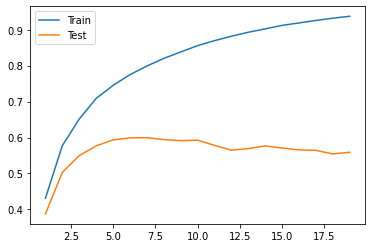

7 0.5995665916467434


In [56]:
xaxis = list(range(1,20))
plt.plot(xaxis,RTr_list)
plt.plot(xaxis,RT_list)
plt.legend(['Train', 'Test'])
plt.show()
print(RT_list.index((max(RT_list)))+1,max(RT_list))

In [57]:
# Random forest
rfRegCO = RandomForestRegressor(max_depth=6,n_estimators=100,n_jobs=-1, criterion='mse',max_features=3,
                             warm_start=True,oob_score=True, bootstrap=True, random_state=1255634)
rfRegCO.fit(dfX_f,dfY_f)


R_tr = rfRegCO.score(dfX_f,dfY_f)  # train R_square
R_test = rfRegCO.score(dfX_test,dfY_test)  # test R_square
print("R_square train: ",R_tr,        "\tR_square test  : ",R_test)

R_square train:  0.7748716959815043 	R_square test  :  0.599024461221501


In [58]:
# Support Vector
svRegrCO = SVR(C=0.06,epsilon=0.1,kernel='linear')
svRegrCO.fit(dfX_f,dfY_f)

R_tr = svRegrCO.score(dfX_f,dfY_f)  # train R_square
R_t = svRegrCO.score(dfX_test,dfY_test)  # CV R_square

print("R_square train: ",R_tr,        "\tR_square test  : ",R_t)

R_square train:  0.6361477078830564 	R_square test  :  0.6020574056107315


### Final Training of SVM Regressor over all the data

(36674, 11)
(36674, 11)
(36674, 5) (36674,)
[19.88973833  4.89380822  3.13151023  1.11360305  0.64996645]


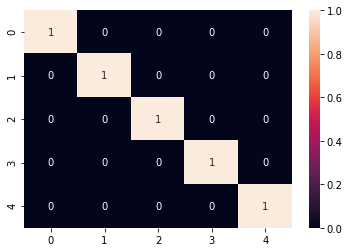

In [59]:
## Data for final training

# =============loading train data ===================
df_f = pd.concat([df_f, df_test_CO]).reset_index(drop =True)
print(df_f.shape)

#===================================================

# Shuffling Data
df_f = shuffle(df_f)
print(df_f.shape)
# ==================================================

# ========Selecting predictor columns===============
X_cols = df_f.drop(columns=['AP','TIT', 'AT','AH','CO','NOX']).columns[:]
#===================================================

# =============data slicing=========================
# train data
dfX_f = df_f.loc[:,X_cols]
dfY_f = df_f.loc[:,y_cols]


# ===================data scale=====================
scalerCO = StandardScaler()
scalerCO.fit(dfX_f)
dfX_f_t = scalerCO.transform(dfX_f)
dfX_f = pd.DataFrame(data = dfX_f_t, columns=X_cols).reset_index(drop=True)

#===================================================
print(dfX_f.shape,dfY_f.shape)
y_cols
#_______________________________________________________________________________


# Polynomial features  # Reqired to do this
from sklearn.preprocessing import PolynomialFeatures
deg = 2
poly = PolynomialFeatures(degree=deg)
poly.fit(dfX_f)
dfX_f = poly.transform(dfX_f)
#_______________________________________________________________________________


decomCO = PCA(n_components=5)
decomCO.fit(dfX_f)
dfX_f = decomCO.transform(dfX_f)
print(decomCO.explained_variance_)
sns.heatmap(np.corrcoef(dfX_f, rowvar=False)>0.1,annot=True)
plt.show()

In [60]:
# Support Vector
svRegrCO = SVR(C=0.06,epsilon=0.1,kernel='linear')
svRegrCO.fit(dfX_f,dfY_f)

R_tr = svRegrCO.score(dfX_f,dfY_f)  # train R_square
R_t = svRegrCO.score(dfX_test,dfY_test)  # CV R_square

print("R_square train: ",R_tr,        "\tR_square test  : ",R_t)

R_square train:  0.6280482886939274 	R_square test  :  0.6133118204954244


In [61]:
# svRegrCO.coef_

## NOX PREDICTION

#### Loading Data

In [62]:
# path of each file
path_train_NOX = "data_folder/train_NOX.csv"

path_CV_NOX = "data_folder/CV_NOX.csv"

# ===========================================================

df_train_NOX = pd.read_csv(path_train_NOX)
df_CV_NOX = pd.read_csv(path_CV_NOX)

#### Statistical Analysis

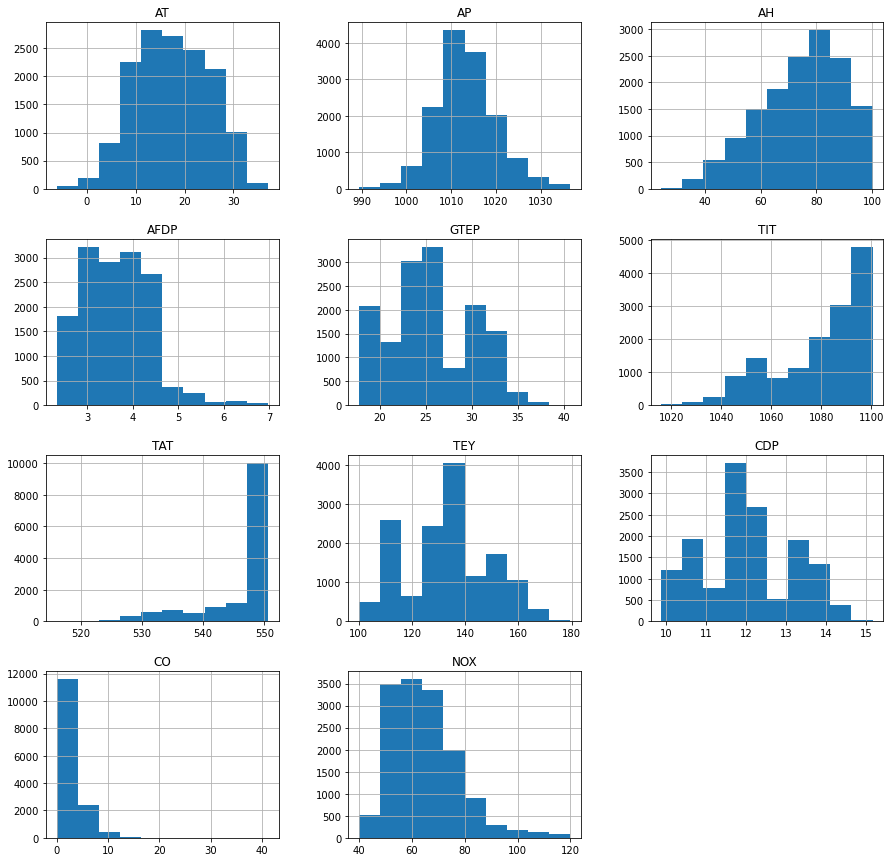

In [63]:
df_train_NOX.hist(figsize=(15,15))
plt.show()

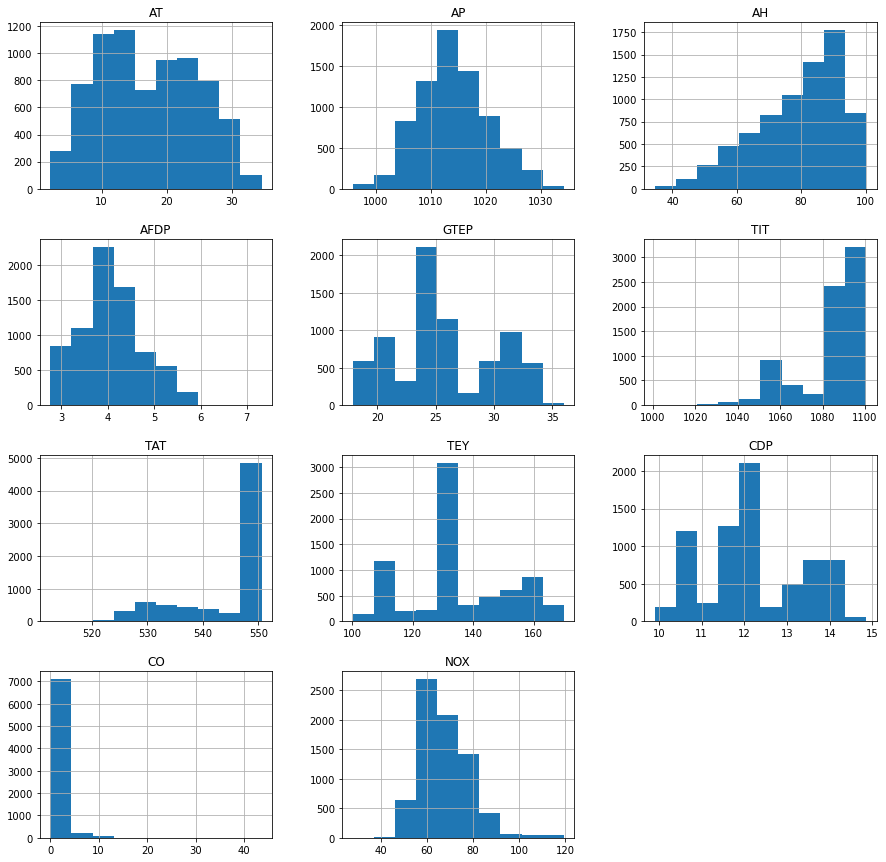

In [64]:
df_CV_NOX.hist(figsize=(15,15))
plt.show()

In [65]:
df_train_NOX.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,14530.000000,14530.000000,14530.000000,14530.000000,14530.000000,14530.000000,14530.000000,14530.000000,14530.000000,14530.000000,14530.000000
mean,17.407717,1013.274244,74.463483,3.646490,25.625360,1080.248541,546.217855,133.093817,12.035166,2.927842,64.880303
std,7.516088,6.723767,15.038853,0.714908,4.443661,18.677587,6.491866,16.289750,1.136243,2.302914,12.636047
min,-6.234800,989.380000,24.085000,2.329500,17.698000,1016.000000,516.040000,100.020000,9.870800,0.005033,40.039000
25%,11.592750,1009.000000,64.146000,3.108825,22.731500,1068.600000,544.560000,122.750000,11.280000,1.509900,55.299250
50%,17.314000,1012.700000,76.519000,3.582600,25.011500,1085.100000,549.830000,133.355000,11.949000,2.148050,63.259500
75%,23.415000,1017.300000,85.953250,4.170650,29.709000,1099.500000,550.030000,146.060000,13.063000,3.676725,71.835000
max,37.103000,1036.600000,100.190000,6.977900,40.716000,1100.500000,550.590000,179.500000,15.159000,41.097000,119.910000


In [66]:
df_CV_NOX.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,7411.000000,7411.000000,7411.000000,7411.000000,7411.000000,7411.000000,7411.000000,7411.000000,7411.000000,7411.000000,7411.000000
mean,17.112261,1014.167883,79.174989,4.090755,25.663721,1084.733909,544.503170,135.745675,12.207578,1.572486,67.575392
std,7.428307,6.293003,13.465898,0.661865,4.325835,16.134972,8.288471,16.209187,1.146561,1.845442,10.683331
min,2.116300,995.790000,34.493000,2.758400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,10.992000,1009.800000,70.428500,3.644750,23.364500,1082.500000,538.560000,130.745000,11.684000,0.726405,60.361500
50%,16.366000,1013.600000,82.129000,4.026300,24.770000,1088.000000,549.860000,133.810000,12.008000,1.155700,65.542000
75%,23.344500,1018.100000,89.778000,4.480350,29.879500,1099.800000,550.040000,148.325000,13.257000,1.754600,74.314500
max,34.532000,1034.200000,100.170000,7.318900,36.003000,1100.600000,550.610000,170.000000,14.851000,43.622000,119.320000


#### Feature and traget variable split

In [67]:
# Shuffling Data
df_train_NOX = shuffle(df_train_NOX)
print(df_train_NOX.shape)
print(df_CV_NOX.shape)
# =============================================

# ========Selecting predictor columns==========

X_cols = df_train_NOX.drop(columns=['AFDP','GTEP','TAT','NOX','CO']).columns[:] # as per paper
y_cols = df_train_NOX.columns[-1]
#==============================================

# =============data slicing====================
# train data
dfX_tr = df_train_NOX.loc[:,X_cols]
dfY_tr = df_train_NOX.loc[:,y_cols]

# CV data
dfX_CV = df_CV_NOX.loc[:,X_cols]
dfY_CV = df_CV_NOX.loc[:,y_cols]
#==============================================


# ===================data scale================
# train data Scale
scaler = StandardScaler()
scaler.fit(dfX_tr)
dfX_tr_t = scaler.transform(dfX_tr)
dfX_tr = pd.DataFrame(data = dfX_tr_t, columns=X_cols).reset_index(drop=True)

# CV data Scale
dfX_CV_t = scaler.transform(dfX_CV)
dfX_CV = pd.DataFrame(data = dfX_CV_t, columns=X_cols).reset_index(drop=True)

#==============================================
print(dfX_tr.shape,dfY_tr.shape,dfX_CV.shape,dfY_CV.shape)
y_cols

(14530, 11)
(7411, 11)
(14530, 6) (14530,) (7411, 6) (7411,)


'NOX'

In [68]:
dfX_tr.head(2)

,AT,AP,AH,TIT,TEY,CDP
0,0.258027,2.086069,-1.231684,0.500695,0.023094,0.061462
1,-1.786006,0.107943,0.696122,1.062886,1.912691,1.769782


In [69]:
# Polynomial features  # Reqired to do this
deg = 2
poly = PolynomialFeatures(degree=deg)
poly.fit(dfX_tr)
dfX_tr = poly.transform(dfX_tr)

poly2 = PolynomialFeatures(degree=deg)
poly2.fit(dfX_CV)
dfX_CV = poly2.transform(dfX_CV)
dfX_tr.shape, dfX_CV.shape

((14530, 28), (7411, 28))

### LINEAR REGRESSION

In [70]:
# Linear Regression
lr = LinearRegression(fit_intercept=True)
lr.fit(dfX_tr,dfY_tr)

yhat = lr.predict(dfX_tr)  # prediction on train data
yhat_CV = lr.predict(dfX_CV) # prediction on CV data

mse = mean_squared_error(yhat, dfY_tr)  # MSE train
mse_CV = mean_squared_error(yhat_CV, dfY_CV)  # MSE CV

R_tr = r2_score(dfY_tr,yhat)  # train R_square
R_CV = r2_score(dfY_CV, yhat_CV)  # CV R_square


# Adjusted R_squared

A_R_tr = 1- ((1-R_tr)*(len(dfY_tr)-1))/(len(dfY_tr)-dfX_tr.shape[1]-1)  # train Adjusted_R_square
A_R_CV = 1- ((1-R_CV)*(len(dfY_CV)-1))/(len(dfY_CV)-dfX_CV.shape[1]-1)  # CV A_djustedR_square

print("RMSE train    : ",np.sqrt(mse),"\tRMSE CV      : ", np.sqrt(mse_CV))
print("R_square train: ",R_tr,        "\tR_square CV  : ",R_CV)
print("Adjusted_R_square train: ",A_R_tr,        "\tAdjusted_R_square CV  : ",A_R_CV)

lr.coef_

RMSE train    :  7.307758559903443 	RMSE CV      :  6.861950944603406
R_square train:  0.6655156431147471 	R_square CV  :  0.5873893617701964
Adjusted_R_square train:  0.6648697868294711 	Adjusted_R_square CV  :  0.5858243254832234


array([-1.52431757e-12, -1.70293798e+01, -1.68874131e+00, -1.52734551e+00,
        2.70249628e+01, -5.12536662e+01,  2.57280401e+01,  2.32790454e+00,
        2.85966518e+00, -1.48156529e+00, -5.02006362e+00,  2.24786527e+01,
       -1.39213051e+01,  5.04908159e-01,  2.07425451e-01, -1.76639001e+00,
        4.64988634e+00, -3.50605881e+00,  8.77741643e-01, -2.49573932e+00,
       -9.60961288e+00,  1.29407486e+01,  1.96643281e+01, -1.94229343e+01,
       -1.54204545e+01,  7.38727709e+01, -1.25927460e+02,  7.06914903e+01])

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


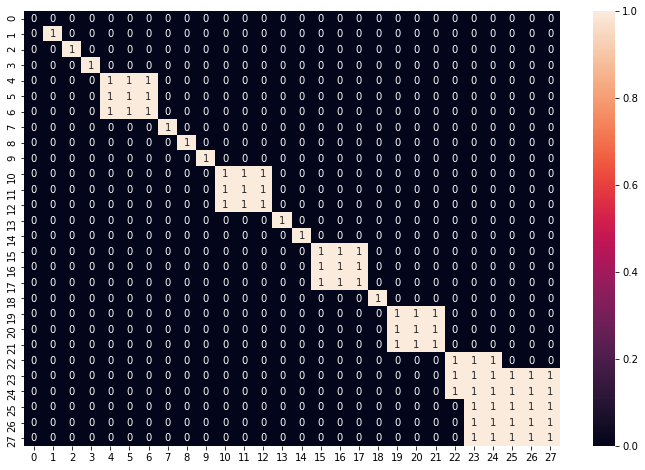

In [71]:
plt.figure(figsize=(12,8))
corr_mat = np.corrcoef(dfX_tr,rowvar=False)

sns.heatmap(abs(corr_mat)>0.7,annot=True)
plt.show()

[7.76709972e+00 5.77010596e+00 3.78688022e+00 3.17894886e+00
 2.90286339e+00 1.96447487e+00 1.46925981e+00 1.26945313e+00
 9.44940582e-01 8.38623580e-01 7.48951851e-01 3.84910337e-01
 3.64049462e-01 1.76031873e-01 1.52856103e-01 8.75091665e-02
 6.54400679e-02 2.36992380e-02 1.59600368e-02 8.23410681e-03
 3.04091588e-03 2.61337770e-03]


<AxesSubplot:>

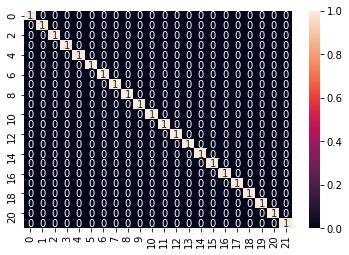

In [72]:
decom = PCA(n_components=22)
decom.fit(dfX_tr)
dfX_tr = decom.transform(dfX_tr)
dfX_CV = decom.transform(dfX_CV)
print(decom.explained_variance_)
sns.heatmap(np.corrcoef(dfX_tr, rowvar=False)>0.1,annot=True)


In [73]:
dfX_tr.shape

(14530, 22)

In [74]:
# Linear Regression
lr = LinearRegression(fit_intercept=True)
lr.fit(dfX_tr,dfY_tr)

yhat = lr.predict(dfX_tr)  # prediction on train data
yhat_CV = lr.predict(dfX_CV) # prediction on CV data

mse = mean_squared_error(yhat, dfY_tr)  # MSE train
mse_CV = mean_squared_error(yhat_CV, dfY_CV)  # MSE CV

R_tr = r2_score(dfY_tr,yhat)  # train R_square
R_CV = r2_score(dfY_CV, yhat_CV)  # CV R_square

# Adjusted R_squared

A_R_tr = 1- ((1-R_tr)*(len(dfY_tr)-1))/(len(dfY_tr)-dfX_tr.shape[1]-1)  # train Adjusted_R_square
A_R_CV = 1- ((1-R_CV)*(len(dfY_CV)-1))/(len(dfY_CV)-dfX_CV.shape[1]-1)  # CV A_djustedR_square

print("RMSE train    : ",np.sqrt(mse),"\tRMSE CV      : ", np.sqrt(mse_CV))
print("R_square train: ",R_tr,        "\tR_square CV  : ",R_CV)
print("Adjusted_R_square train: ",A_R_tr,        "\tAdjusted_R_square CV  : ",A_R_CV)

lr.coef_

RMSE train    :  7.648032308627918 	RMSE CV      :  6.724456610309838
R_square train:  0.6336410051860681 	R_square CV  :  0.6037588327298896
Adjusted_R_square train:  0.6330854183737771 	Adjusted_R_square CV  :  0.6025789050525828


array([  0.36476058,   1.62552691,  -0.73078952,  -0.05587186,
         1.97823377,  -0.32385277,  -0.2592184 ,   0.91307075,
         6.23884317,   0.48073694,   0.63545821,  -0.90734202,
         4.36262571,   5.94927459,  -0.56836426,  -4.31923916,
        -0.8961885 ,   2.18679655, -27.32674067,  -0.69710288,
         3.16522415,  46.22804409])

### RIDGE

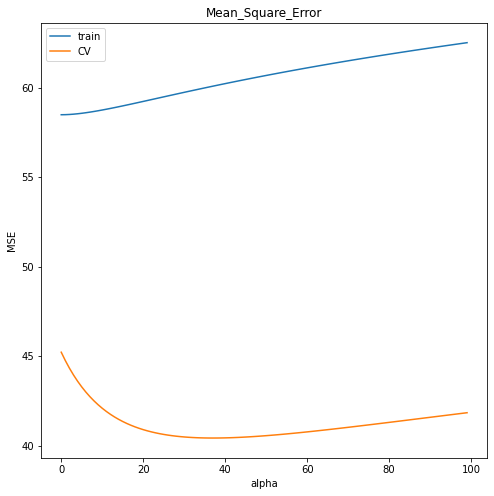

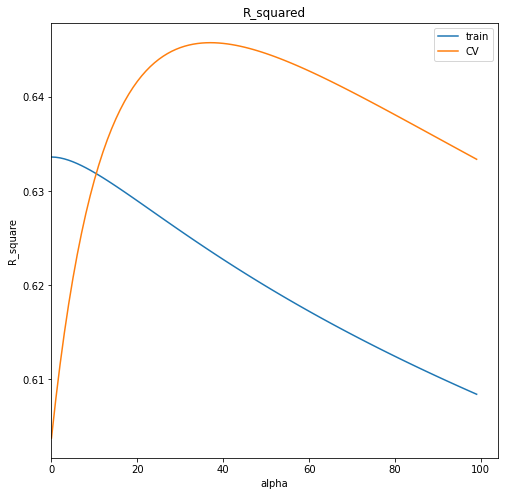

0 0.6336410051860681
37 0.6457974438288941


In [75]:
# Ridge Regression
mse_tr_list = []
mse_CV_list = []

R_tr_list = []
R_CV_list = []

for alpha in range(0,100):
    ridg = Ridge(alpha=alpha, fit_intercept=True,max_iter=None, solver='auto')
    ridg.fit(dfX_tr,dfY_tr)

    yhat = ridg.predict(dfX_tr)  # prediction on train data
    yhat_CV = ridg.predict(dfX_CV) # prediction on CV data


    mse = mean_squared_error(yhat, dfY_tr)  # MSE train
    mse_tr_list.append(mse)

    mse_CV = mean_squared_error(yhat_CV, dfY_CV)  # MSE CV
    mse_CV_list.append(mse_CV)


    R_tr = ridg.score(dfX_tr,dfY_tr)  # train R_square
    R_tr_list.append(R_tr)

    R_CV = ridg.score(dfX_CV,dfY_CV)  # CV R_square
    R_CV_list.append(R_CV)
    

plt.figure(figsize=(8,8))
plt.plot(mse_tr_list)
plt.plot(mse_CV_list)
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.legend(['train', 'CV'])
plt.title("Mean_Square_Error")
plt.show()



plt.figure(figsize=(8,8))
plt.plot(R_tr_list)
plt.plot(R_CV_list)
plt.title("R_squared")

plt.xlabel("alpha")
plt.legend(['train', 'CV'])
plt.ylabel("R_square")
plt.xlim(0,)
plt.show()


print(R_tr_list.index(max(R_tr_list)), max(R_tr_list))
print(R_CV_list.index(max(R_CV_list)), max(R_CV_list))

In [76]:
ridg = Ridge(alpha=37, fit_intercept=True,max_iter=None, solver='auto')
ridg.fit(dfX_tr,dfY_tr)

yhat = ridg.predict(dfX_tr)  # prediction on train data
yhat_CV = ridg.predict(dfX_CV) # prediction on CV data


mse = mean_squared_error(yhat, dfY_tr)  # MSE train
mse_CV = mean_squared_error(yhat_CV, dfY_CV)  # MSE CV
R_tr = ridg.score(dfX_tr,dfY_tr)  # train R_square
R_CV = ridg.score(dfX_CV,dfY_CV)  # CV R_square

print(np.sqrt(mse),np.sqrt(mse_CV))
print(R_tr,R_CV)

7.751722996531926 6.357747034560059
0.6236396003548281 0.6457974438288941


### DECISION TREE

In [77]:
# Decision Tree regression model
dtr = DecisionTreeRegressor(max_depth=7, criterion='mse', random_state=126865488)
dtr.fit(dfX_tr,dfY_tr)

R_tr = dtr.score(dfX_tr,dfY_tr)  # train R_square
R_CV = dtr.score(dfX_CV,dfY_CV)  # CV R_square

# Adjusted R_squared

A_R_tr = 1- ((1-R_tr)*(len(dfY_tr)-1))/(len(dfY_tr)-dfX_tr.shape[1]-1)  # train Adjusted_R_square
A_R_CV = 1- ((1-R_CV)*(len(dfY_CV)-1))/(len(dfY_CV)-dfX_CV.shape[1]-1)  # CV A_djustedR_square

print("R_square train: ",R_tr,        "\tR_square CV  : ",R_CV)
print("Adjusted_R_square train: ",A_R_tr,        "\tAdjusted_R_square CV  : ",A_R_CV)

R_square train:  0.7036445365857491 	R_square CV  :  0.5974428966259923
Adjusted_R_square train:  0.7031951107778553 	Adjusted_R_square CV  :  0.5962441613425288


### RANDOM FOREST

In [78]:
for i in range(1,18):
    rfReg = RandomForestRegressor(max_depth=i,n_estimators=100,n_jobs=-1, criterion='mse',
                                warm_start=True,oob_score=True, bootstrap=True,
                                  max_features=7, random_state=126865488)
    rfReg.fit(dfX_tr,dfY_tr)


    R_tr = rfReg.score(dfX_tr,dfY_tr)  # train R_square
    R_CV = rfReg.score(dfX_CV,dfY_CV)  # CV R_square
    print(i,"--","R_square train: ",R_tr,        "\tR_square CV  : ",R_CV)

1 -- R_square train:  0.2511622025072011 	R_square CV  :  0.23030376877909242
2 -- R_square train:  0.4028781418916607 	R_square CV  :  0.42483386896772224
3 -- R_square train:  0.5056905903581712 	R_square CV  :  0.5455209640903618
4 -- R_square train:  0.5751485960435918 	R_square CV  :  0.6044044442681462
5 -- R_square train:  0.643208733072053 	R_square CV  :  0.6529464225745247
6 -- R_square train:  0.6958008236714432 	R_square CV  :  0.6697366616227395
7 -- R_square train:  0.7449264969857314 	R_square CV  :  0.6846146201735541
8 -- R_square train:  0.7841153199983988 	R_square CV  :  0.6879758281408636
9 -- R_square train:  0.8198082671276836 	R_square CV  :  0.6898653567735802
10 -- R_square train:  0.8517741531432239 	R_square CV  :  0.6883531500765872
11 -- R_square train:  0.8775541199910537 	R_square CV  :  0.6855619758260103
12 -- R_square train:  0.8981896632641968 	R_square CV  :  0.6814471403389144
13 -- R_square train:  0.9159429965656021 	R_square CV  :  0.68680163988

In [79]:
rfReg = RandomForestRegressor(max_depth=6,n_estimators=100,n_jobs=-1, criterion='mse',
                                warm_start=True,oob_score=True, bootstrap=True,
                                  max_features=7, random_state=126865488)
rfReg.fit(dfX_tr,dfY_tr)


R_tr = rfReg.score(dfX_tr,dfY_tr)  # train R_square
R_CV = rfReg.score(dfX_CV,dfY_CV)  # CV R_square
print("R_square train: ",R_tr,        "\tR_square CV  : ",R_CV)

R_square train:  0.6958008236714432 	R_square CV  :  0.6697366616227395


### SUPPORT VECTOR

In [80]:
svRegr = SVR(C=2,epsilon=0.1,kernel='rbf') #--> Final
svRegr.fit(dfX_tr, dfY_tr)

R_tr = svRegr.score(dfX_tr,dfY_tr)  # train R_square
R_CV = svRegr.score(dfX_CV,dfY_CV)  # CV R_square

print("R_square train: ",R_tr,        "\tR_square CV  : ",R_CV)

R_square train:  0.7126045372651857 	R_square CV  :  0.5346110027542768


### FINAL TRAINING ON BOTH TRAIN AND CV DATA


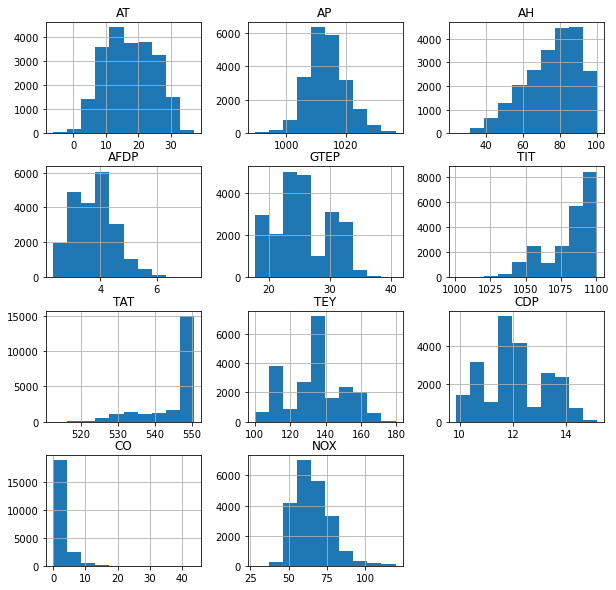

In [81]:
df_f_NOX = pd.concat([df_train_NOX,df_CV_NOX]).reset_index(drop =True)
df_f_NOX.hist(figsize=(10,10))
plt.show()

(14786, 11)


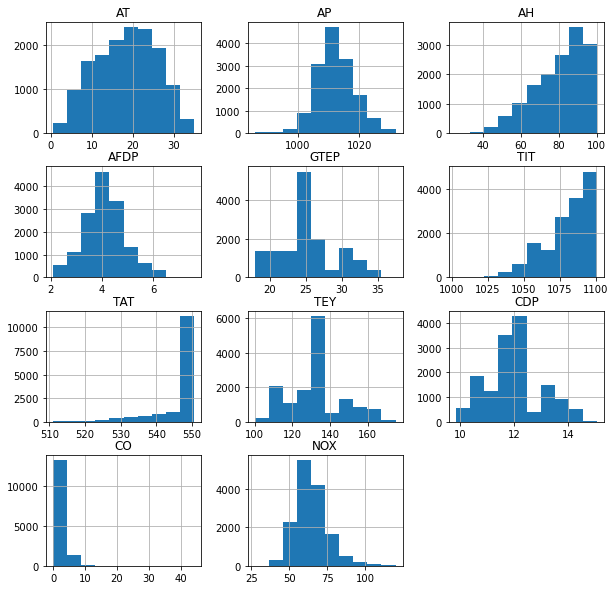

In [82]:
path_test_NOX = "data_folder/test_NOX.csv"

# =============loading test data ===================
df_test_NOX = pd.read_csv(path_test_NOX)
print(df_test_NOX.shape)
# ===========================================================
df_test_NOX.hist(figsize=(10,10))
plt.show()

In [83]:
# Shuffling Data
df_f_NOX = shuffle(df_f_NOX)
print(df_f_NOX.shape)
# =============================================

# ========Selecting predictor columns==========
X_cols = df_f_NOX.drop(columns=['AFDP','GTEP','TAT','NOX','CO']).columns[:] # as per paper
y_cols = df_f_NOX.columns[-1]
#==============================================

# =============data slicing====================
# train data
dfX_f_NOX = df_f_NOX.loc[:,X_cols]
dfY_f_NOX = df_f_NOX.loc[:,y_cols]

# test data
dfX_test_NOX = df_test_NOX.loc[:,X_cols]
dfY_test_NOX = df_test_NOX.loc[:,y_cols]
#==============================================


# ===================data scale================
# train data Scale
scalerNOX = StandardScaler()
scalerNOX.fit(dfX_f_NOX)
dfX_f_t_NOX = scalerNOX.transform(dfX_f_NOX)
dfX_f_NOX = pd.DataFrame(data = dfX_f_t_NOX, columns=X_cols).reset_index(drop=True)


# test data scale
dfX_test_t_NOX = scalerNOX.transform(dfX_test_NOX)
dfX_test_NOX = pd.DataFrame(data = dfX_test_t_NOX, columns=X_cols).reset_index(drop=True)
#==============================================
print(dfX_f_NOX.shape,dfY_f_NOX.shape, dfX_test_NOX.shape, dfY_test_NOX.shape)
y_cols

(21941, 11)
(21941, 6) (21941,) (14786, 6) (14786,)


'NOX'

In [84]:
dfX_test_NOX.head(2)

,AT,AP,AH,TIT,TEY,CDP
0,-1.395459,-0.860706,1.411558,-1.254641,-1.182672,-1.302645
1,-1.405395,-0.784888,1.433265,-1.249081,-1.181445,-1.308771


In [85]:
# Polynomial features  # Reqired to do this
from sklearn.preprocessing import PolynomialFeatures
deg = 2
polyNOX = PolynomialFeatures(degree=deg)
polyNOX.fit(dfX_f_NOX)
dfX_f_NOX = polyNOX.transform(dfX_f_NOX)

poly2NOX = PolynomialFeatures(degree=deg)
poly2NOX.fit(dfX_test_NOX)
dfX_test_NOX = poly2NOX.transform(dfX_test_NOX)
dfX_f_NOX.shape, dfX_test_NOX.shape

((21941, 28), (14786, 28))

In [86]:
# Linear Regression # ----> Final
LRmodel_NOX = LinearRegression(fit_intercept=True)
LRmodel_NOX.fit(dfX_f_NOX,dfY_f_NOX)

yhatST_NOX= LRmodel_NOX.predict(dfX_f_NOX)  # prediction on train data
yhatST_test_NOX = LRmodel_NOX.predict(dfX_test_NOX) # prediction on test data


MSE_ST = mean_squared_error(yhatST_NOX, dfY_f_NOX)  # MSE train
MSE_ST_t = mean_squared_error(yhatST_test_NOX, dfY_test_NOX)  # MSE test

R_ST = r2_score(dfY_f_NOX,yhatST_NOX)  # train R_square
R_ST_t = r2_score(dfY_test_NOX, yhatST_test_NOX)  # test R_square

print("RMSE train    : ",np.sqrt(MSE_ST),"\tRMSE test      : ", np.sqrt(MSE_ST_t))
print("R_square train: ",R_ST,        "\tR_square test  : ",R_ST_t)
LRmodel_NOX.coef_

RMSE train    :  6.9360204624550015 	RMSE test      :  6.883680684608922
R_square train:  0.6702674230512162 	R_square test  :  0.6085797458251945


array([-2.36857762e-14, -1.54444703e+01, -1.06721736e+00, -1.55203628e+00,
        2.45075925e+01, -3.92068262e+01,  1.58509425e+01,  3.89945240e-01,
        2.16237629e+00, -1.10801765e+00,  9.05877635e-01,  7.93211174e+00,
       -4.84769217e+00,  5.76678052e-01,  5.04758341e-01, -1.15961883e+00,
        3.38391354e+00, -2.84246750e+00,  5.40193565e-01, -2.33600701e+00,
       -2.01917014e+00,  4.77163147e+00,  1.00962174e+01,  4.28880278e+00,
       -2.06392752e+01,  2.94762965e+01, -5.58146092e+01,  3.66283390e+01])

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


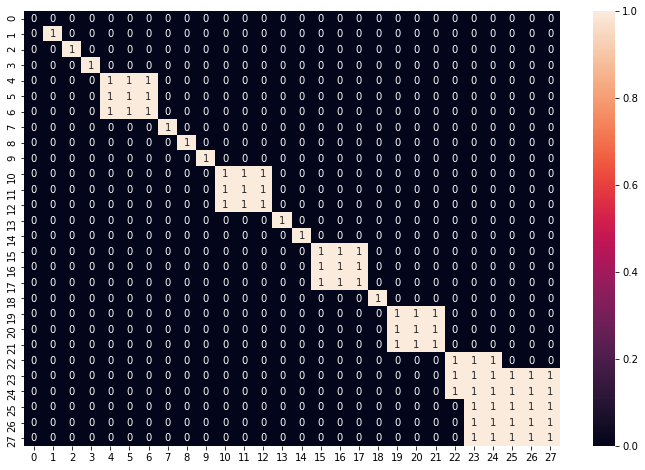

In [87]:
plt.figure(figsize=(12,8))
corr_mat_f = np.corrcoef(dfX_f_NOX,rowvar=False)
sns.heatmap(abs(corr_mat_f)>0.7,annot=True)
plt.show()

[7.77736881 5.64460197 3.62892715 3.07890855 2.84037699 2.10166791
 1.35867945 1.2031484  0.96617856 0.8288396  0.70988994 0.37637272
 0.34770952 0.21333137 0.13538081 0.11055434 0.07458218 0.02554132
 0.01585954]


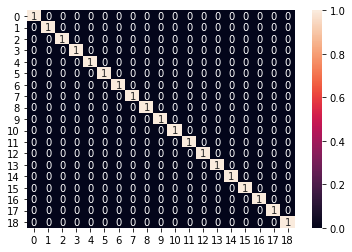

In [88]:
decomNOX = PCA(n_components=19)
decomNOX.fit(dfX_f_NOX)
dfX_f_NOX = decomNOX.transform(dfX_f_NOX)
dfX_test_NOX = decomNOX.transform(dfX_test_NOX)
print(decomNOX.explained_variance_)
sns.heatmap(np.corrcoef(dfX_f_NOX, rowvar=False)>0.1,annot=True)
plt.show()

In [89]:
dfX_f_NOX.shape

(21941, 19)

In [90]:
# Linear Regression # ----> Final
LRmodel_NOX = LinearRegression(fit_intercept=True)
LRmodel_NOX.fit(dfX_f_NOX,dfY_f_NOX)

yhatST = LRmodel_NOX.predict(dfX_f_NOX)  # prediction on train data
yhatST_test = LRmodel_NOX.predict(dfX_test_NOX) # prediction on test data


MSE_ST = mean_squared_error(yhatST, dfY_f_NOX)  # MSE train
MSE_ST_t = mean_squared_error(yhatST_test, dfY_test_NOX)  # MSE test

R_ST = r2_score(dfY_f_NOX,yhatST)  # train R_square
R_ST_t = r2_score(dfY_test_NOX, yhatST_test)  # test R_square

print("RMSE train    : ",np.sqrt(MSE_ST),"\tRMSE test      : ", np.sqrt(MSE_ST_t))
print("R_square train: ",R_ST,        "\tR_square test  : ",R_ST_t)
LRmodel_NOX.coef_

RMSE train    :  7.375750366136688 	RMSE test      :  7.064493984952259
R_square train:  0.627133347039263 	R_square test  :  0.5877468514228885


array([ 3.64661191e-01,  1.37384993e+00, -7.69511938e-01, -5.46981245e-03,
        2.33192723e+00, -4.07720040e-01, -1.12034684e+00,  5.75990580e-01,
        5.95998166e+00, -7.94575163e-01,  6.44382112e-01, -1.18980384e+00,
        3.97618558e+00,  5.41983294e+00, -1.86829582e+00, -1.95358052e+00,
       -1.71679713e+00,  4.72878860e-01, -2.65889667e+01])

In [91]:
# Decision Tree regression model
dtr_NOX = DecisionTreeRegressor(max_depth=5, criterion='mse', random_state=126865488)
dtr_NOX.fit(dfX_f_NOX,dfY_f_NOX)

R_tr = dtr_NOX.score(dfX_f_NOX,dfY_f_NOX)  # train R_square
R_t = dtr_NOX.score(dfX_test_NOX,dfY_test_NOX)  # CV R_square

print("R_square train: ",R_tr,        "\tR_square test  : ",R_t)

R_square train:  0.6016792408165805 	R_square test  :  0.4230622779824087


In [92]:
RTr_list = []
RT_list = []
for i in range(1,20):
    rfReg_NOX = RandomForestRegressor(max_depth=i,n_estimators=100,n_jobs=-1, criterion='mse',max_features=7,
                             warm_start=True,oob_score=True, bootstrap=True, random_state=126865488)
    rfReg_NOX.fit(dfX_f_NOX,dfY_f_NOX)


    R_tr = rfReg_NOX.score(dfX_f_NOX,dfY_f_NOX)  # train R_square
    RTr_list.append(R_tr)
    R_test = rfReg_NOX.score(dfX_test_NOX,dfY_test_NOX)  # test R_square
    RT_list.append(R_test)

    print('depth: ',i,"\tR_square train: ",R_tr,        "\tR_square test  : ",R_test)

depth:  1 	R_square train:  0.25473985339040695 	R_square test  :  0.2218828035932825
depth:  2 	R_square train:  0.40735338429447665 	R_square test  :  0.354474475862531
depth:  3 	R_square train:  0.5052196045491679 	R_square test  :  0.43013309931976285
depth:  4 	R_square train:  0.5807811326906966 	R_square test  :  0.4753497764773821
depth:  5 	R_square train:  0.6410761642027796 	R_square test  :  0.509473768174423
depth:  6 	R_square train:  0.6871048143183943 	R_square test  :  0.5264332190609715
depth:  7 	R_square train:  0.728847603194648 	R_square test  :  0.5360616459693172
depth:  8 	R_square train:  0.7672006131575313 	R_square test  :  0.5466873064773707
depth:  9 	R_square train:  0.7989975358736325 	R_square test  :  0.5487278161985154
depth:  10 	R_square train:  0.8276895316975361 	R_square test  :  0.5456442856279615
depth:  11 	R_square train:  0.8544061636261073 	R_square test  :  0.5429834968469895
depth:  12 	R_square train:  0.8786458719796331 	R_square test 

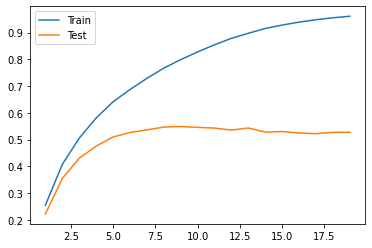

9 0.5487278161985154


In [93]:
xaxis = list(range(1,20))
plt.plot(xaxis,RTr_list)
plt.plot(xaxis,RT_list)
plt.legend(['Train', 'Test'])
plt.show()
print(RT_list.index((max(RT_list)))+1,max(RT_list))

In [94]:
# Random forest
rfReg_NOX = RandomForestRegressor(max_depth=6,n_estimators=100,n_jobs=-1, criterion='mse',max_features=7,
                             warm_start=True,oob_score=True, bootstrap=True, random_state=126865488)
rfReg_NOX.fit(dfX_f_NOX,dfY_f_NOX)


R_tr = rfReg_NOX.score(dfX_f_NOX,dfY_f_NOX)  # train R_square
R_test = rfReg_NOX.score(dfX_test_NOX,dfY_test_NOX)  # test R_square
print("R_square train: ",R_tr,        "\tR_square test  : ",R_test)

R_square train:  0.6871048143183943 	R_square test  :  0.5264332190609715


In [95]:
# Support Vector
svRegr_NOX = SVR(C=2,epsilon=0.1,kernel='rbf')
svRegr_NOX.fit(dfX_f_NOX,dfY_f_NOX)

R_tr = svRegr_NOX.score(dfX_f_NOX,dfY_f_NOX)  # train R_square
R_t = svRegr_NOX.score(dfX_test_NOX,dfY_test_NOX)  # CV R_square

print("R_square train: ",R_tr,        "\tR_square test  : ",R_t)

R_square train:  0.7176284314557031 	R_square test  :  0.5870804291151344


### Final Training of SVM Regressor over all the data

(36727, 11)
(36727, 6) (36727,)
[8.29793235 5.86488848 3.67543174 3.00256723 2.8582103  2.10597803
 1.4649996  1.23152911 0.96016432 0.87369206 0.71947848 0.42662568
 0.35468827 0.25582544 0.14609901 0.12088272 0.07934128 0.02921334
 0.02411174]


<AxesSubplot:>

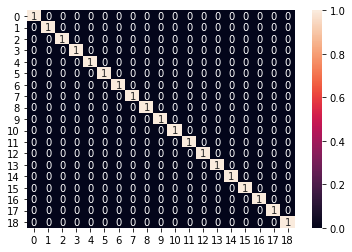

In [96]:
df_f_NOX = pd.concat([df_f_NOX,df_test_NOX]).reset_index(drop =True)

# Shuffling Data
df_f_NOX = shuffle(df_f_NOX)
print(df_f_NOX.shape)
# =============================================

# ========Selecting predictor columns==========
X_cols = df_f_NOX.drop(columns=['AFDP','GTEP','TAT','NOX','CO']).columns[:] # as per paper
y_cols = df_f_NOX.columns[-1]
#==============================================

# =============data slicing====================
# train data
dfX_f_NOX = df_f_NOX.loc[:,X_cols]
dfY_f_NOX = df_f_NOX.loc[:,y_cols]
#==============================================


# ===================data scale================
# train data Scale
scalerNOX = StandardScaler()
scalerNOX.fit(dfX_f_NOX)
dfX_f_t_NOX = scalerNOX.transform(dfX_f_NOX)
dfX_f_NOX = pd.DataFrame(data = dfX_f_t_NOX, columns=X_cols).reset_index(drop=True)
#==============================================
print(dfX_f_NOX.shape,dfY_f_NOX.shape)
y_cols
#_______________________________________________________________________________
# Polynomial features  # Reqired to do this


from sklearn.preprocessing import PolynomialFeatures
deg = 2
polyNOX = PolynomialFeatures(degree=deg)
polyNOX.fit(dfX_f_NOX)
dfX_f_NOX = polyNOX.transform(dfX_f_NOX)
dfX_f_NOX.shape
#_______________________________________________________________________________

decomNOX = PCA(n_components=19)
decomNOX.fit(dfX_f_NOX)
dfX_f_NOX = decomNOX.transform(dfX_f_NOX)
print(decomNOX.explained_variance_)
sns.heatmap(np.corrcoef(dfX_f_NOX, rowvar=False)>0.1,annot=True)

In [97]:
# Support Vector
svRegr_NOX = SVR(C=2,epsilon=0.1,kernel='rbf')
svRegr_NOX.fit(dfX_f_NOX,dfY_f_NOX)

R_tr = svRegr_NOX.score(dfX_f_NOX,dfY_f_NOX)  # train R_square
R_t = svRegr_NOX.score(dfX_test_NOX,dfY_test_NOX)  # CV R_square

print("R_square train: ",R_tr,        "\tR_square test  : ",R_t)

R_square train:  0.698628725240259 	R_square test  :  0.6616062964814511


# WEB APP

In [98]:
!pip install --quiet gradio

In [99]:
import pickle
import gradio

In [100]:
# Saving Models which have best R_squared
pickle.dump(svRegrCO,open('svRegrCO-model.pkl','wb'))
pickle.dump(svRegr_NOX,open('svRegr_NOX-model.pkl','wb'))

In [101]:
# Loading the saved model
svRegCO_model = pickle.load(open('svRegrCO-model.pkl','rb'))
svRegr_NOX_model = pickle.load(open('svRegr_NOX-model.pkl','rb'))

In [102]:
# Function to predict CO emmision

def CO_pred(AFDP, GTEP, TAT, TEY, CDP):
    x_in = np.array([AFDP, GTEP, TAT, TEY, CDP]).reshape(1,-1)
    x_in = scalerCO.transform(x_in)
    poly_CO = PolynomialFeatures(degree=2)
    poly_CO.fit(x_in)
    x_in = poly_CO.transform(x_in)
    x_in = decomCO.transform(x_in)
    pred = svRegCO_model.predict(x_in)

    return {"CO emmision in mg/m^3 :":pred[0]}

In [103]:
# Function to predict NOX emmision

def NOX_pred(AT, AP, AH, TIT, TEY, CDP):
    x_in = np.array([AT, AP, AH, TIT, TEY, CDP]).reshape(1,-1)
    x_in = scalerNOX.transform(x_in)
    poly_NOX = PolynomialFeatures(degree=2)
    poly_NOX.fit(x_in)
    x_in = poly_NOX.transform(x_in)
    x_in = decomNOX.transform(x_in)
    pred = svRegr_NOX_model.predict(x_in)

    return {"NOX emmision in mg/m^3 :":pred[0]}

In [106]:
CO_pred(3.1526,22.343,550.01,118.64,11.189)

{'CO emmision in mg/m^3 :': 2.8354697745198454}

In [107]:
NOX_pred(26.459,1008.0,58.096,1064.5,118.64,11.189)

{'NOX emmision in mg/m^3 :': 51.423816065823104}

In [108]:
# AFDP, GTEP, TAT, TEY, CDP

iface = gradio.Interface(CO_pred, [gradio.inputs.Number(default=None, label="Air filter difference pressure in mbar"),
                                   gradio.inputs.Number(default=None, label="Gas turbine exhaust pressure in mbar"),
                                   gradio.inputs.Number(default=None, label="Turbine after temperature in celcius"),
                                   gradio.inputs.Number(default=None, label="Turbine energy yield in MWH"),
                                   gradio.inputs.Number(default=None, label="Compressor discharge pressure in mbar")],
                                   "key_values", description = "WEB-APP to predict the CO emmision")
iface.launch(debug=False)

Running locally at: http://127.0.0.1:7860/
To create a public link, set `share=True` in `launch()`.
Interface loading below...


(<Flask 'gradio.networking'>, 'http://127.0.0.1:7860/', None)

In [109]:
# AT, AP, AH, TIT, TEY, CDP

iface = gradio.Interface(NOX_pred, [gradio.inputs.Number(default=None, label="Ambient temperature in Celcius"),
                                    gradio.inputs.Number(default=None, label="Ambient pressure in mbar"),
                                    gradio.inputs.Number(default=None, label="Ambient humidity in (%)"),
                                    gradio.inputs.Number(default=None, label="Turbine inlet temperature in Celcius"),
                                    gradio.inputs.Number(default=None, label="Turbine energy yield in MWH"),
                                    gradio.inputs.Number(default=None, label="Compressor discharge pressure in mbar")],
                                    "key_values", description = "WEB-APP to predict the NOX emmision")
iface.launch(debug=False)

Running locally at: http://127.0.0.1:7861/
To create a public link, set `share=True` in `launch()`.
Interface loading below...


(<Flask 'gradio.networking'>, 'http://127.0.0.1:7861/', None)

In [110]:
df_train_CO.head(5)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
1914,14.373,1002.0,63.247,2.4441,20.646,1043.7,549.81,107.50,10.226,4.0920,68.790
13056,20.739,1014.5,88.752,3.8068,22.881,1066.9,549.67,121.01,11.290,2.4892,54.415
1186,9.827,1020.0,98.502,3.4299,25.064,1077.5,549.87,134.68,11.924,1.3938,65.158
3182,27.678,1007.4,72.217,5.0691,29.538,1099.4,548.10,144.29,12.975,1.1417,55.658
13237,12.018,1019.8,84.290,3.3815,24.107,1078.3,549.92,132.46,11.809,2.8062,57.785


# References & Citation

Heysem Kaya, PÄ±nar TÃ¼fekci and ErdinÃ§ Uzun. 'Predicting CO and NOx emissions from gas turbines: novel data and a benchmark PEMS', Turkish Journal of Electrical Engineering & Computer Sciences, vol. 27, 2019, pp. 4783-4796, [Web Link]. Weblink: [Web Link]

Data Source : https://archive.ics.uci.edu/ml/datasets/Gas+Turbine+CO+and+NOx+Emission+Data+Set#